In [1]:
import sys
sys.path.append('/home/yzy/bioSIMS/code/analysis')
from utils import *
sys.path.append('/home/yzy/software/FIt-SNE')
from fast_tsne import fast_tsne
from SIMS_cluster2 import *
from SIMS_diff import *
from sklearn.neighbors import *

from importlib import reload
import kneed
import sys
import scanpy as sc
sys.path
sys.path.append('/home/yzy/software2/FINCH-Clustering/python/')
print(sys.path)
from finch import FINCH
from pyemd import *
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
sys.path.append('/home/yzy/software/gini')
from gini import *
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0,2,3"; 

def show_images(images, cols = 1, titles = None,cmps='jet'):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
#         print(cols)
#         cmp = cmps[n]
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
        
    
        plt.imshow(image,cmap=cmps)
        plt.xticks([])
        plt.yticks([])
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()
# from home.bioSIMS.code.analysis.utils import *
# from bioSIMS.code.analysis.utils import *

Using TensorFlow backend.
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yzy/anacond

['/data01/software/MATLAB/extern/engines/python/dist/matlab/engine/glnxa64', '', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/Sphinx-1.5.6-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/spherecluster-0.1.5-py3.6.egg', '/data01/yzy/software/xy_python_utils', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/Sphinx-1.2.3-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/openne-0.0.0-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow_clone/lib/python36.zip', '/home/yzy/anaconda3/envs/tensorflow_clone/lib/python3.6', '/home/yzy/anaconda3/envs/tensorflow_clone/lib/python3.6/lib-dynload', '/home/yzy/.local/lib/python3.6/site-packages', '/home/yzy/.local/lib/python3.6/site-packages/scprep-0.11.0-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow_c

/home/yzy/software2/FINCH-Clustering/python/finch.py:13: UserWarning: pyflann not installed: No module named 'index'
  warnings.warn('pyflann not installed: {}'.format(e))


In [36]:
test_sample_all.shape

(65536, 198)

In [ ]:
134.22-(134-205.95)

In [ ]:
matter_list = pickle.load(open(matter_list_filename,'rb'))
matter_list = np.array(matter_list)

In [ ]:
len(matter_list)

In [ ]:
np.where(matter_list==134.05)

In [ ]:
np.where(matter_list==101.03)

In [ ]:
np.where(matter_list==106.99)

In [221]:
data_mat_filename_temp = '/home/yzy/bioSIMS/data/process/{0}/cut/rst/datamat.mat'
matter_list_filename_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/matters_candidate.pkl'

# data = 'SPE1'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_718.mat'




# data='191125_gastric_div15_None_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_269.mat'


# data='20190115_liverfiber1_filter'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_198.mat'
# data='liver_hoechst_blood_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_114.mat'
# data = '20190303_liverfiber_fix'
# data = '20190308_liver_P1LF2_2'

# data = 'P3_low_1_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_621.mat'
# data = 'P3_high_2_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_238.mat'

# data='liver-xwh-2-1'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_286.mat'

# data='SPE1'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_286.mat'

# data='20190103_lung3_filter'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_164.mat'

# data='20190117_liverfiber2_pos'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'


# data='P4_low0_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_793.mat'


# data='20190117_liverfiber2_pos'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'

# data='rat0_low0_auto'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_699.mat'


# data='20190117_liverfiber2_pos_gaussian_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'

# data = 'P5LC_POS1_HIGH0_None_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_196.mat'

# data='mouse0_liver0_neg0_high0_div15_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_224.mat'

# data='mouse0_lung0_neg0_high0_div10_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_225.mat'


# data='mouse0_lung0_pos0_high0_div10_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_193.mat'


# data='mouse0_liver0_neg1_high0_5_None_ada'
# data='mouse0_liver0_neg1_high0_None_ada'
# # # # data='mouse0_liver0_neg1_high0_5_None_auto'
# data='mouse0_liver0_neg1_high0_div15_gaussian_ada'
# data='mouse0_liver0_neg1_high0_div15_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_244.mat'

# data = 'PCs/mouse0_liver0_neg0_low_PC0_div20_None_auto'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_659.mat'
 
data = 'mouse0_liver0_neg2_high0_None_auto'
test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_244.mat'



# data = 'mouse0_liver0_neg2_high0_None_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_244.mat'


# data='mouse0_kidney0_neg0_high0_20_None_auto'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_221.mat'

# data='mouse0_liver0_pos1_high1_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_200.mat'

# data='mouse0_liver0_neg1_low0_div10_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_691.mat'



matter_list_filename = matter_list_filename_temp.format(data)
data_mat_filename = data_mat_filename_temp.format(data)
test_sample_filename = test_sample_temp.format(data)
test_sample_all = sio.loadmat(test_sample_filename)['test_samples']
mode='none'
norm='none'
[original_data,cell_related_data]=get_train_data(data_mat_filename,mode,norm,batch_num_list=[1])
train_x=cell_related_data['train_x']
cell_idx=cell_related_data['cell_idx']
cell_pos=cell_related_data['cell_pos']
num_cells = np.max(cell_idx)
matter_list = pickle.load(open(matter_list_filename,'rb'))
matter_list = np.array(matter_list)

In [23]:
matter_list.shape

(244,)

In [ ]:
# plt.hist(mean_profile_list_median[:,matter_list==180.74])
filter_condition = (mean_profile_list_median[:,matter_list==125.02]>=2.7)
filtered_cell_idx = np.where(filter_condition)[0]+1
filtered_pixel_idx = np.hstack([np.where(cell_idx==i)[0] for i in filtered_cell_idx])
train_x = train_x[filtered_pixel_idx,:]
cell_idx = cell_idx[filtered_pixel_idx]
cell_pos = cell_pos[filtered_pixel_idx]
num_cells = np.sum(filter_condition)

cell_idx_tmp = cell_idx.copy()
for i in range(np.unique(cell_idx).shape[0]):
    cur_idx = np.unique(cell_idx)[i]
    cell_idx_tmp[cell_idx==cur_idx]=i+1
cell_idx=cell_idx_tmp

In [ ]:
num_cells

In [ ]:
mean_profile_list_median.shape

In [94]:
train_x_ori = train_x.copy()
train_x = train_x_tmp.copy()

In [222]:
train_x_median = (train_x+1)/(np.percentile(train_x,50,axis=1,keepdims=True)+1)
train_x_total = train_x/np.sum(train_x,axis=1,keepdims=True)
train_x_median = np.log(train_x_median+1)
train_x_total = np.log(train_x_total+1)
# train_x_A = (train_x+1)/(train_x[:,matter_list==134.06]+1)
sum_profile_list_median = []
sum_profile_list_total = []

max_profile_list_median = []
max_profile_list = []
mean_profile_list_median = []
max_profile_list_total = []
mean_profile_list_total = []
mean_profile_list=[]
# mean_profile_list_A=[]
# max_profile_list_A = []
for i in range(num_cells):
        mean_profile_list_median.append(np.mean(train_x_median[cell_idx==i+1,:],axis=0))
        max_profile_list_median.append(np.max(train_x_median[cell_idx==i+1,:],axis=0))
        max_profile_list.append(np.max(train_x[cell_idx==i+1,:],axis=0))
#         mean_profile_list_A.append(np.mean(train_x_A[cell_idx==i+1,:],axis=0))
#         max_profile_list_A.append(np.max(train_x_A[cell_idx==i+1,:],axis=0))
        
        sum_profile_list_median.append(np.sum(train_x_median[cell_idx==i+1,:],axis=0))
        mean_profile_list.append(np.mean(train_x[cell_idx==i+1,:],axis=0))
        mean_profile_list_total.append(np.mean(train_x_total[cell_idx==i+1,:],axis=0))
        max_profile_list_total.append(np.max(train_x_total[cell_idx==i+1,:],axis=0))
        sum_profile_list_total.append(np.sum(train_x_total[cell_idx==i+1,:],axis=0))
        
mean_profile_list_median = np.array(mean_profile_list_median)
max_profile_list_median = np.array(max_profile_list_median)
mean_profile_list_total = np.array(mean_profile_list_total)
max_profile_list_total = np.array(max_profile_list_total)
sum_profile_list_median = np.array(sum_profile_list_median)
sum_profile_list_total = np.array(sum_profile_list_total)
mean_profile_list = np.array(mean_profile_list)
max_profile_list = np.array(max_profile_list)
# mean_profile_list_A = np.array(mean_profile_list_A)
# max_profile_list_A = np.array(max_profile_list_A)

In [ ]:
# 测试：先把pixel离散化，再BoW

In [317]:

in_X =  train_x
# in_X = mean_profile_list_median
# g = map(str,range(in_X.shape[1]))
g = map(str,matter_list)
Genes = []
None_idx = 0
Genes = g
# obs_name must be str
obs_name = list(map(str,range(in_X.shape[0])))
obs = pd.DataFrame(index=obs_name)

# var_name must be str
var = pd.DataFrame(index=Genes)

#     var['Genes'] = Genes
a_pixel = ad.AnnData(in_X,  obs=obs,var=var, dtype='float32')


In [318]:
a_pixel.obs['cell_idx'] = cell_idx
a_pixel.obs['cell_pos'] = cell_pos

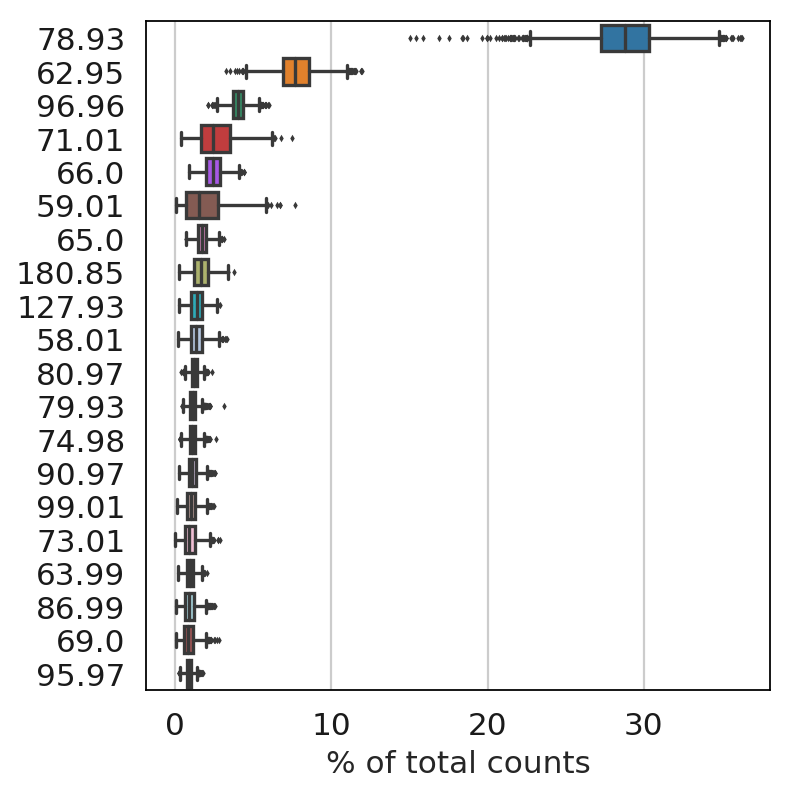

In [319]:
sc.pl.highest_expr_genes(a_pixel, n_top=20)

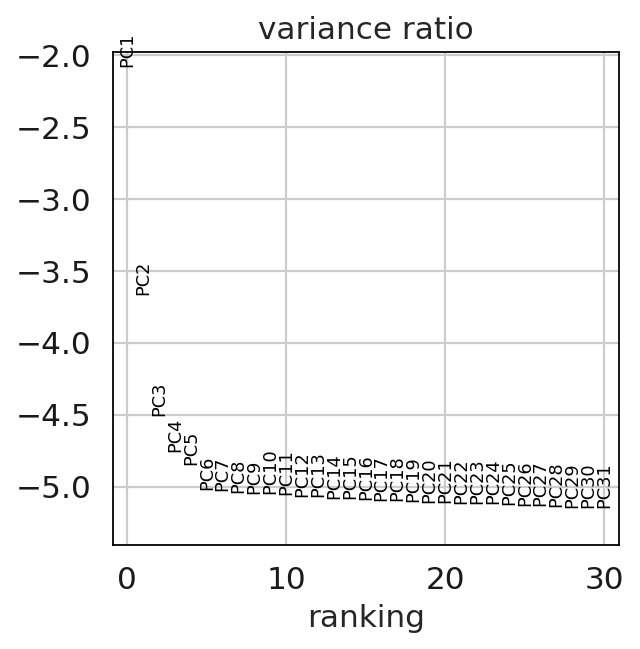

In [320]:
a_pixel.raw = a_pixel
sc.pp.normalize_per_cell(a_pixel)
sc.pp.scale(a_pixel)
sc.tl.pca(a_pixel, svd_solver='arpack')
sc.pl.pca_variance_ratio(a_pixel, log=True)
sc.pp.neighbors(a_pixel, n_neighbors=10, n_pcs=40)

In [342]:
a_pixel[:,0].X

ArrayView([-1.7418224 ,  0.24233747, -1.847438  , ...,  0.01747395,
           -0.29087245, -0.33339536], dtype=float32)

In [347]:
hdbscan.HDBSCAN().fit_predict(a_pixel[:,['115.0','130.98']].X)

array([ 76,  39,  -1, ...,  -1, 239,  -1])

In [344]:
gini_list = []
for i in range(a_pixel.shape[1]):
    cur_m = a_pixel[:,i].X
    cur_gini = gini(cur_m)
    gini_list.append(cur_gini)
    print(i,matter_list[i],cur_gini)

0 50.1 0.1984869026949941
1 51.01 0.2738511895453348
2 52.01 0.19879439871976548
3 53.01 0.272874253682472
4 54.03 0.22193274964237464
5 55.01 0.3298467192615365
6 56.02 0.21558790670044073
7 57.0 0.3218889095178644
8 58.01 0.23952589425642767
9 59.01 0.39266780796361034
10 60.55 0.9047586255905735
11 60.96 0.3311169849286367
12 62.95 0.15051166290793333
13 63.56 0.5831007795315057
14 63.99 0.20939708170670124
15 65.0 0.19488332757524374
16 66.0 0.21228033260995222
17 67.01 0.17352628409940044
18 68.01 0.17369967896544908
19 69.0 0.257503442705449
20 70.02 0.18908379387521318
21 71.01 0.28614772884970807
22 72.01 0.22786988790349713
23 73.01 0.243041280828554
24 73.99 0.19588173587883714
25 74.98 0.18829457305981007
26 78.93 0.09628710733609143
27 79.93 0.18338390138269592
28 80.97 0.15396440659538813
29 82.0 0.19384817708160534
30 83.01 0.21725662074144758
31 84.01 0.20968491948394652
32 85.02 0.2570187226229984
33 85.99 0.24809902534236616
34 86.99 0.2513045174119554
35 87.99 0.23914

In [321]:
sc.tl.umap(a_pixel)

In [330]:
sc.tl.louvain(a_pixel)

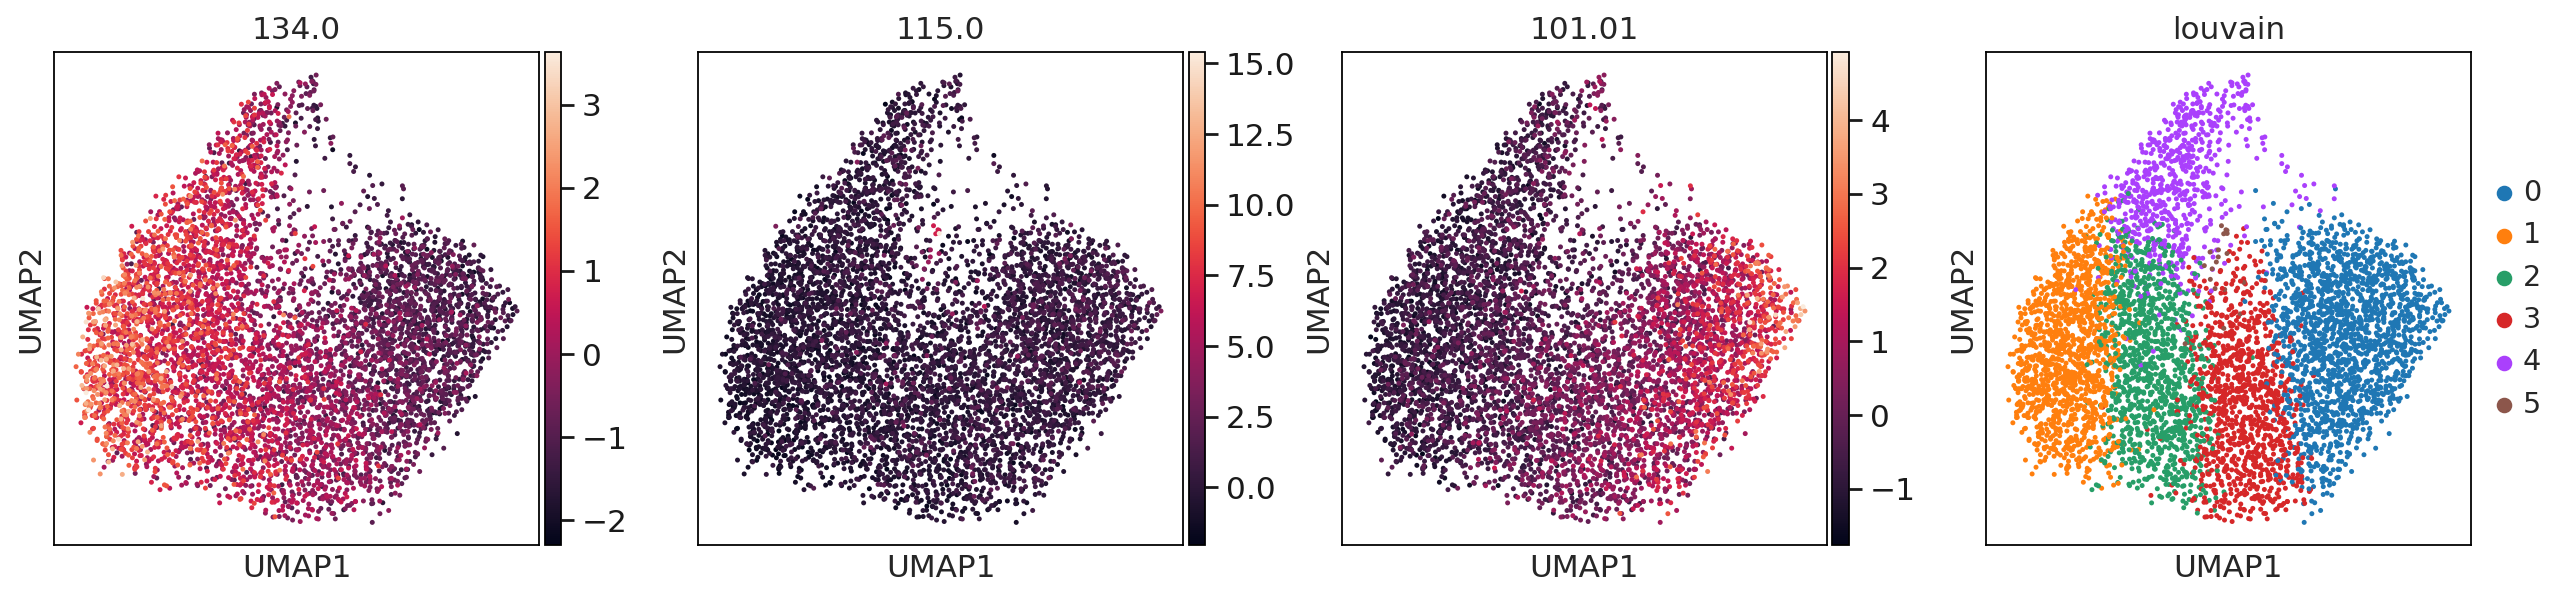

In [331]:
sc.pl.umap(a_pixel, color=['134.0', '115.0', '101.01','louvain'],use_raw=False)

In [315]:
a_pixel

AnnData object with n_obs × n_vars = 5958 × 198 
    obs: 'cell_idx', 'cell_pos', 'n_counts'
    uns: 'pca', 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [314]:
sc.tl.draw_graph(a_pixel)

KeyboardInterrupt: 

In [ ]:
sc.pl.draw_graph(adata, color='paul15_clusters', legend_loc='on data')

In [ ]:
matter_profile = np.transpose(test_sample_all)
matter_umap_embed = umap.UMAP(metric='correlation').fit_transform(matter_profile)
matter_umap_y = hdbscan.HDBSCAN().fit_predict(matter_umap_embed)
sns.scatterplot(x=matter_umap_embed[:,0],y=matter_umap_embed[:,1],hue=matter_umap_y,s=10,palette=sns.hls_palette(np.unique(matter_umap_y).shape[0]))



In [ ]:
matter_list[matter_umap_y==1]

In [ ]:
select_matter = np.zeros_like(matter_list)
select_matter[matter_umap_y==0]=1

remove_matter_list=[]
select_matter[np.where(np.isin(matter_list,remove_matter_list))] = 0

select_matter[matter_list==76.29]=1


train_x = train_x[:,select_matter==1]
test_sample_all = test_sample_all[:,select_matter==1]
matter_list = matter_list[select_matter==1]

In [ ]:
matter_list.shape

In [ ]:
train_x_dec = train_x_dec[:,matter_umap_y==1]
test_sample_all_dec = test_sample_dec[:,matter_umap_y==1]
# matter_list = matter_list[matter_umap_y==1]

In [223]:
def get_img(matter,test_sample_all=test_sample_all,matter_list=matter_list,mode='None'):
    if mode=='median':
        test_sample_all = (test_sample_all+1)/(np.percentile(test_sample_all,50,axis=1,keepdims=True)+1)
    elif mode=='total':
        test_sample_all = (test_sample_all)/np.sum(test_sample_all,axis=1,keepdims=True)
    else:
        pass
        
    return test_sample_all[:,matter_list==matter].reshape(256,256)

In [ ]:
#找high FF


# gini_rep = sum_profile_list_median
FF_rep = sum_profile_list_median
# gini_rep = np.exp2(gini_rep)
# gini_rep = test_sample_all
FF_list = np.zeros(shape=(FF_rep.shape[1],))
for i in range(FF_rep.shape[1]):
    cur_col = FF_rep[:,i]
    cur_FF = np.var(cur_col)/np.mean(cur_col)
    FF_list[i] = cur_FF
FF_sort = np.argsort(FF_list)
plt.plot(np.sort(FF_list))
matter_list[FF_sort]


n_splits = 50
interest_matter_idx_list = FF_sort[:]
interest_matter_list = matter_list[interest_matter_idx_list]
images = list(map(get_img,interest_matter_list))
titles = list(map(lambda x:'{0} m/z:{1}'.format(str(matter_list[x]),FF_list[x]),interest_matter_idx_list))
each_split = int(np.ceil(len(images)/n_splits))
for i in range(n_splits):
    show_range = slice(i*each_split,min((i+1)*each_split,len(images)))
    show_images(images=images[show_range],titles=titles[show_range],cmps='jet')    


In [ ]:
num_peaks_list = []
for matter in matter_list:
    print(matter)
    cord_img = get_img(matter,mode=None)
    coordinates = peak_local_max(cord_img, min_distance=5,threshold_rel=0.5)
    num_peaks_list.append(coordinates.shape[0])
num_peaks_list = np.array(num_peaks_list)


x = np.arange(num_peaks_list.shape[0])

y = np.sort(num_peaks_list)
sort_y = np.argsort(num_peaks_list)
y=np.flip(y)
sort_y = np.flip(sort_y)
# plt.plot(x,y)
kneedle=kneed.KneeLocator(x,y,S=15,curve='convex',direction='decreasing')
kneedle.plot_knee()
# matter_list[sort_y]
    

    
n_splits = 50
# gini_rep = sum_profile_list_median
# # gini_rep = test_sample_all
# gini_list = np.zeros(shape=(gini_rep.shape[1],))
# for i in range(gini_rep.shape[1]):
#     cur_col = gini_rep[:,i]
#     cur_gini = gini(cur_col)
#     gini_list[i] = cur_gini
# gini_sort = np.argsort(gini_list)
interest_matter_idx_list = sort_y[-200:]
interest_matter_list = matter_list[interest_matter_idx_list]

# interest_matter_list = matter_list[FF_sort]
images = list(map(get_img,interest_matter_list))
titles = list(map(lambda x:'{0} m/z:{1}'.format(str(matter_list[x]),num_peaks_list[x]),interest_matter_idx_list))




each_split = int(np.ceil(len(images)/n_splits))

for i in range(n_splits):
    show_range = slice(i*each_split,min((i+1)*each_split,len(images)))
    show_images(images=images[show_range],titles=titles[show_range],cmps='jet')    
# show_range = slice(8,len(im_list))
# show_range = slice(0,int(np.ceil(len(im_list)/2)))
# show_range = slice(int(np.ceil(len(im_list)/2)),len(im_list))


# show_images_zoomin(images=im_list[show_range],titles=title_list[show_range],cords=sub_cord_list[show_range])

In [ ]:
# tmp = np.where(matter_list==58.99)[0][0]
# images = list(map(get_img,matter_list))
images = [get_img(matter,mode=None) for matter in matter_list]

image_max_list = []
for matter in matter_list:
    tmp = np.where(matter_list==matter)[0][0]
    
    image_max = ndi.maximum_filter(images[tmp], size=20, mode='constant')
    image_max_list.append(image_max.reshape(65536,))
image_max_list = np.array(image_max_list)

cor_mat = squareform(pdist(image_max_list,'correlation'))

%matplotlib inline
use_cor_mat = cor_mat
# %这里用tsne induced的距离很好，用median train_x算得，距离用cosine
# interest_matter_idx = gini_sort[-1]
interest_matter_idx = np.where(matter_list==50)[0][0]
x = np.arange(use_cor_mat.shape[0])
original_y = use_cor_mat[interest_matter_idx,:]

y = np.sort(original_y)
sort_y = np.argsort(original_y)
y=np.flip(y)
sort_y = np.flip(sort_y)
# plt.plot(x,y)
kneedle=kneed.KneeLocator(x,y,S=15,curve='convex',direction='decreasing')
kneedle.plot_knee()
interest_matter_idx_list = sort_y[-50:]

# interest_matter_idx_list = sort_y[kneedle.elbow:]
interest_matter_list=matter_list[interest_matter_idx_list]


images = list(map(get_img,interest_matter_list))
titles = list(map(lambda x:'{0} m/z:{1}'.format(str(matter_list[x]),original_y[x]),interest_matter_idx_list))




# each_split = int(np.ceil(len(images)/n_splits))
each_split = 5
for i in range(n_splits):
    show_range = slice(i*each_split,min((i+1)*each_split,len(images)))
    show_images(images=images[show_range],titles=titles[show_range],cmps='jet')  


In [ ]:
train_x_preprocess.shape

In [32]:
cell_idx.min()

1

In [40]:
mark_list

[284,
 260,
 275,
 267,
 310,
 335,
 373,
 378,
 383,
 382,
 380,
 377,
 365,
 340,
 322,
 309,
 212,
 224,
 139,
 341,
 535,
 51,
 303,
 232,
 212,
 188,
 213,
 200,
 346,
 634,
 535,
 693,
 691,
 442,
 25,
 28,
 2,
 233,
 234,
 298,
 278,
 302,
 428,
 450]

In [39]:
np.where(matter_list==87.36)

(array([40]),)

In [77]:
HEG_87 = [87.36,59.31,69.32,71.34,101.41,221.56]
scale_ratio = 1.35
HEG_87_idx = [np.where(matter_list==m)[0][0] for m in HEG_87]
train_x_tmp = train_x.copy()
for i in range(train_x.shape[0]):
    cur_cell_idx = cell_idx[i]-1
    if cur_cell_idx in mark_list:
        train_x_tmp[i,HEG_87_idx] = train_x_tmp[i,HEG_87_idx]*scale_ratio

In [226]:
import utils
reload(utils)
from utils import *

SIMS_id_t_list = [5,10,15,20,25,30,35,40,50]

# liverfiberfix
# HEG_list = [115.35,117.32,122.34,131.34,147.35,152.38,168.39,170.41]

# liverfiber1
# HEG_list = [115,116.96,121.98,130.98,146.96,151.99,167.99,170.01]
# HEG_list = [115,121.98,130.98,167.99,170.01]

# SPE1
# HEG_list = [89.92,91.93,107.92,114.91,121.93,122.90,123.91,128.93,129.93,130.91,132.90,139.90,146.91]

# PL_list = [134,143.92,148.95,158.90]
# HEG_list.extend(PL_list)

# P5_pos_high 
# HEG_list= [61.32,85.4,97.43]

HEG_list = matter_list
# HEG_list = matter_list[FF_sort[-70:]]
# HEG_list=matter_list[sort_y[-3:]]
# HEG_list=matter_list[sort_y[kneedle.elbow:]]
# HEG_list = filtered_matter
# HEG_list = matter_list[np.argsort(gini_list)][-10:-1]
# matter_list[sort_y[kneedle.elbow:]]
# HEG_list = matter_list[sort_y[kneedle.elbow:]]
# random_idx = np.random.permutation(matter_list.shape[0])[0:10]
# random_idx=[]
HEG_col_idx = [list(matter_list).index(HEG) for HEG in HEG_list]
# HEG_col_idx.extend(random_idx)
# train_x_preprocess = Normalizer(norm='l1').fit_transform(train_x)
# netwidths=[128,128,128]
netwidths=[128,128,128]

error_threshold=0
train_x_HEG = train_x[:,HEG_col_idx]
train_x_preprocess = train_x_HEG
# train_x_preprocess = (train_x_HEG+1)/(train_x_HEG[:,matter_list==133.92]+1)

train_x_preprocess = (train_x_HEG)/np.sum(train_x_HEG,axis=1,keepdims=True)
# train_x_preprocess = (train_x_HEG+1)/(np.percentile(train_x_HEG,50,axis=1,keepdims=True)+1)




# train_x_preprocess = MinMaxScaler().fit_transform(train_x_preprocess)
# train_x_preprocess = np.log(train_x_preprocess+1)

# train_x_preprocess = train_x_preprocess-train_x_preprocess.mean(axis=0)
# U, s, V = np.linalg.svd(train_x_preprocess, full_matrices=False)
# train_x_preprocess = np.dot(U, np.diag(s))[:,:50]

# noise_matrix = np.random.rand(train_x_preprocess.shape[0],train_x_preprocess.shape[1])
# noise_matrix = np.ones_like(train_x_preprocess)
# train_x_preprocess = np.hstack([train_x_preprocess,noise_matrix])


rep_list = get_distil_rep(train_x_preprocess,cell_idx,num_cells,SIMS_id_t_list, verbose=False,epochs=200,netwidths=netwidths,low_dim=netwidths[2],error_threshold=error_threshold)


Epoch 1/200
4709/4709 [==============================] - 1s 258us/step - loss: 6.3488 - softmax_loss: 6.3488 - center_loss: 4.2663
Epoch 2/200
4709/4709 [==============================] - 0s 89us/step - loss: 6.1048 - softmax_loss: 6.1048 - center_loss: 8.0241
Epoch 3/200
4709/4709 [==============================] - 0s 84us/step - loss: 5.9271 - softmax_loss: 5.9271 - center_loss: 8.8708
Epoch 4/200
4709/4709 [==============================] - 0s 89us/step - loss: 5.8161 - softmax_loss: 5.8161 - center_loss: 12.6618
Epoch 5/200
4709/4709 [==============================] - 0s 89us/step - loss: 5.6719 - softmax_loss: 5.6719 - center_loss: 20.4976
Epoch 6/200
4709/4709 [==============================] - 0s 88us/step - loss: 5.5527 - softmax_loss: 5.5527 - center_loss: 31.0616
Epoch 7/200
4709/4709 [==============================] - 0s 88us/step - loss: 5.4913 - softmax_loss: 5.4913 - center_loss: 36.9954
Epoch 8/200
4709/4709 [==============================] - 0s 89us/step - loss: 5.4558 

In [63]:
a.X

array([[ 9.2021883e-01, -7.7752702e-02, -7.6567656e-01, ...,
        -1.9553190e-01, -7.9529814e-02, -5.0841826e-01],
       [ 1.4832636e+00,  9.8427224e-01,  6.1784232e-01, ...,
         1.7086228e+00,  1.1727047e+00,  7.4848354e-01],
       [-1.1448240e+00,  7.4565604e-02,  5.4912072e-01, ...,
        -2.8377309e-01,  7.8301162e-01, -3.7253439e-02],
       ...,
       [ 1.3155549e+00,  6.1300552e-01, -8.2530928e-01, ...,
        -1.9499505e-03,  2.1188921e-01, -9.8210841e-01],
       [ 3.6484966e-01,  2.0274794e+00, -5.0460905e-01, ...,
         4.8521799e-01,  1.0461092e+00,  7.0874818e-02],
       [-5.3730547e-01,  8.1736678e-01, -8.2530928e-01, ...,
        -1.1599290e+00, -1.1086814e+00, -9.8210841e-01]], dtype=float32)

In [129]:
import anndata as ad
sc.settings.set_figure_params(dpi=80)







In [158]:
# ID
in_X =  rep_list[3]
# in_X = mean_profile_list_median
g = map(str,range(in_X.shape[1]))
# g = map(str,matter_list)
Genes = []
None_idx = 0
Genes = g
# obs_name must be str
obs_name = list(map(str,range(in_X.shape[0])))
obs = pd.DataFrame(index=obs_name)

# var_name must be str
var = pd.DataFrame(index=Genes)

#     var['Genes'] = Genes
a = ad.AnnData(in_X,  obs=obs,var=var, dtype='float32')
a.uns['rep_list'] = rep_list

In [107]:
sc.pp.neighbors(a)
sc.tl.umap(a)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [108]:
a

AnnData object with n_obs × n_vars = 724 × 244 
    obs: 'pred'
    uns: 'rep_list', 'neighbors'
    obsm: 'X_umap', 'X_pca'

In [97]:
import anndata as ad
# mean
# in_X =  rep_list[3]
in_X = mean_profile_list_median
# g = map(str,range(in_X.shape[1]))
g = map(str,matter_list)
Genes = []
None_idx = 0
Genes = g
# obs_name must be str
obs_name = list(map(str,range(in_X.shape[0])))
obs = pd.DataFrame(index=obs_name)

# var_name must be str
var = pd.DataFrame(index=Genes)

#     var['Genes'] = Genes
a = ad.AnnData(in_X,  obs=obs,var=var, dtype='float32')
a.uns['rep_list'] = rep_list

In [118]:
rep_embed = umap.UMAP(metric='precomputed',n_neighbors=30,n_components=2).fit_transform(input_dist)


In [135]:
a.obsm['X_umap'] = rep_embed


In [154]:
a.obs['Mouse liver clustering'] =pred_y
a.obs['Mouse liver clustering'] = a.obs['Mouse liver clustering'].astype('category')

In [205]:
a.obs['pred'] =pred_y
a.obs['pred'] = a.obs['pred'].astype('category')

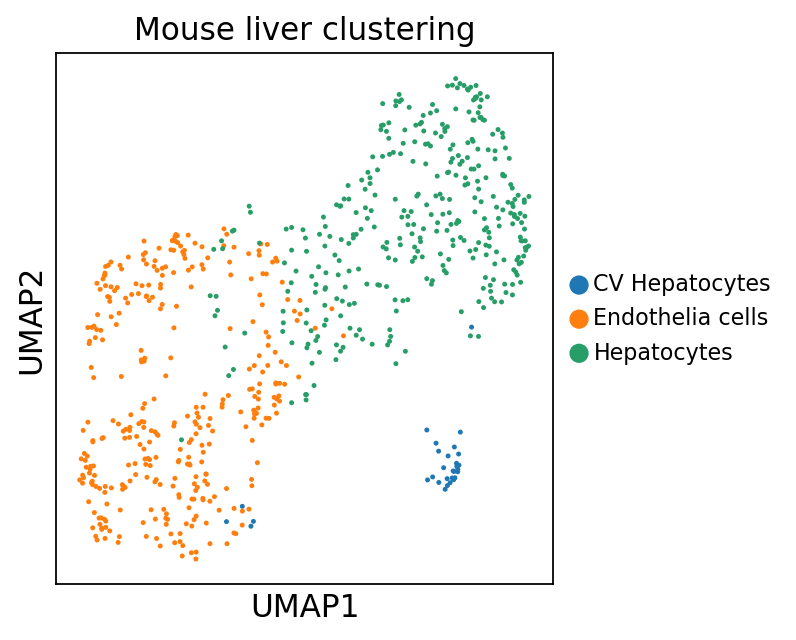

In [220]:
save_umap = 'umap2.pdf'

sc.pl.scatter(a,basis='umap',color=['Mouse liver clustering'],projection='2d',size=20,legend_fontsize=10,save=save_umap)
# sc.pl.scatter(a,basis='umap',color=['Mouse liver clustering'],projection='2d',size=20,legend_loc='on data',legend_fontsize=10)






In [159]:
a

AnnData object with n_obs × n_vars = 724 × 244 
    obs: 'pred', 'Mouse liver clustering'
    uns: 'rep_list', 'neighbors', 'pred_colors', 'rank_genes_groups', 'Mouse liver clustering_colors'
    obsm: 'X_umap', 'X_pca'

In [171]:
new_cluster_names = [
    'CV Hepatocytes',
    
    'Endothelia cells',
    'Hepatocytes',
]
a.rename_categories('pred', new_cluster_names)

Omitting rank_genes_groups/scores as old categories do not match.
Omitting rank_genes_groups/names as old categories do not match.
Omitting rank_genes_groups/logfoldchanges as old categories do not match.
Omitting rank_genes_groups/pvals as old categories do not match.
Omitting rank_genes_groups/pvals_adj as old categories do not match.


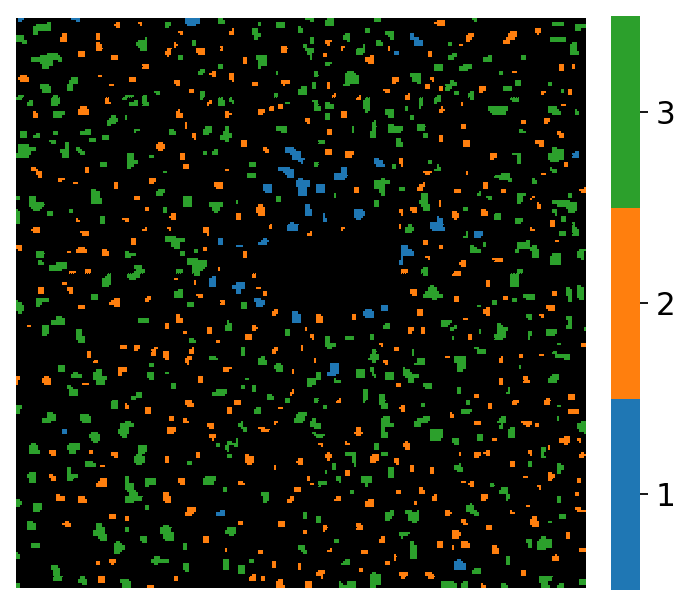

In [206]:
# save_cluster_image = '/home/yzy/ipynbs/figures/Fig2/cluster_img.pdf'
# plot_label_image(a.obs['pred'],a.uns['pred_colors'],save = save_cluster_image)
plot_label_image(a.obs['pred'],a.uns['pred_colors'])

In [214]:
cmp_mask_2 = a.uns['pred_colors'].copy()
cmp_mask_2[0] = 'k'
cmp_mask_2[1] = 'k'

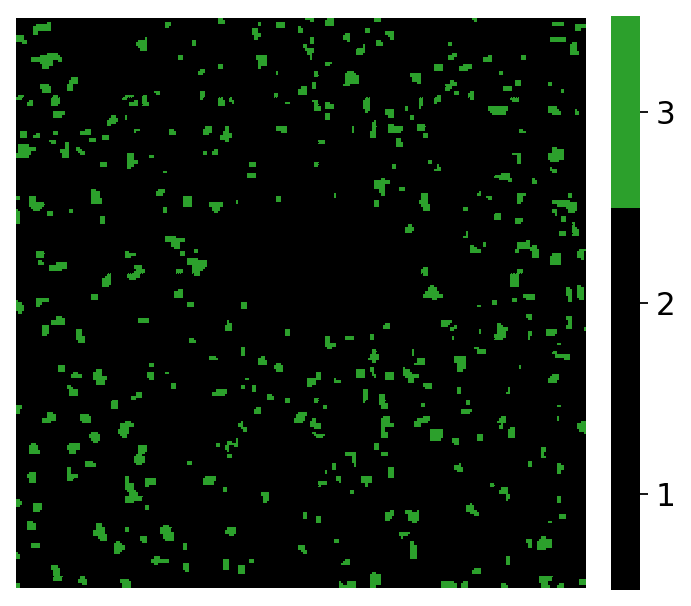

In [219]:
save_cluster_image = '/home/yzy/ipynbs/figures/Fig2/cluster_img_mask3.pdf'

plot_label_image(a.obs['pred'],cmp_mask_2,save=save_cluster_image)

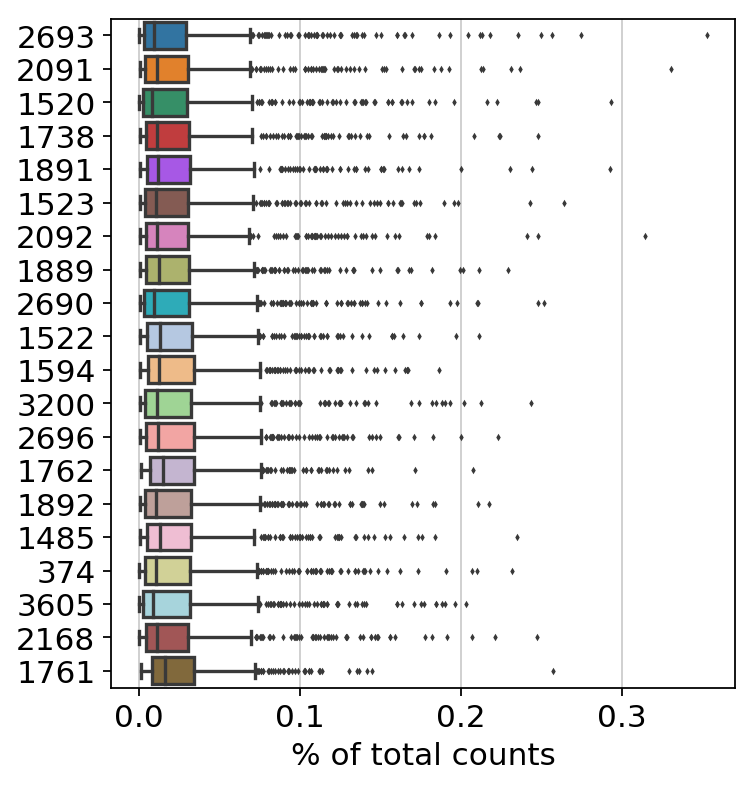

In [159]:
sc.pl.highest_expr_genes(a, n_top=20)


In [178]:
sc.pp.normalize_per_cell(a,key_n_counts='n_counts_all')
sc.pp.scale(a)

In [179]:
sc.tl.pca(a, svd_solver='arpack',n_comps=50)
sc.pp.neighbors(a, n_neighbors=10, n_pcs=10)

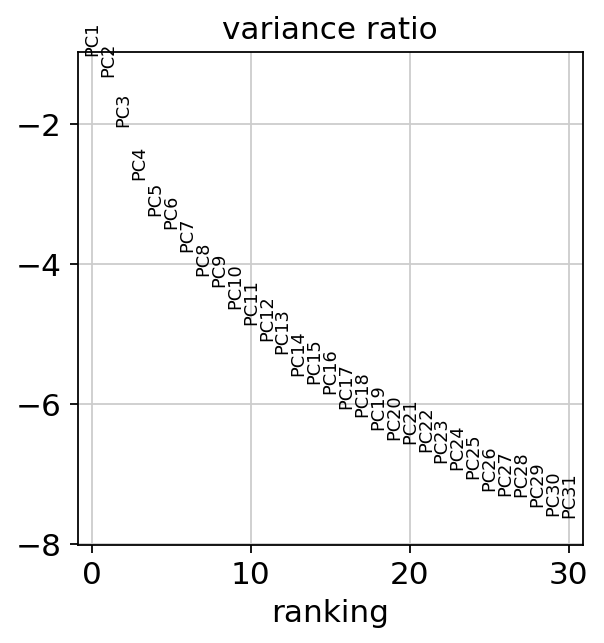

In [161]:
# sc.tl.pca(a, svd_solver='arpack',n_comps=50)
sc.pl.pca_variance_ratio(a, log=True)

In [140]:
c, num_clust, req_c = FINCH(a.obsm['X_pca'][:,:25], initial_rank=None, req_clust=None, distance='euclidean', verbose=True)

pred_FINCH = c[:,4]
a.obs['FINCH'] = pred_FINCH
a.obs['FINCH'] = a.obs['FINCH'].astype('category')

Partition 0: 40 clusters
Partition 1: 8 clusters
Partition 2: 3 clusters


/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


IndexError: index 4 is out of bounds for axis 1 with size 3

In [268]:
# pred_SIMLR,aff_SIMLR = SIMLR(a.X,3)
pred_SIMLR,aff_SIMLR = SIMLR(rep_list[3],6)

a.obs['SIMSCluster'] = pred_SIMLR.astype('int')
a.obs['SIMSCluster'] = a.obs['SIMSCluster'].astype('category')
a.obsm['SIMLR_aff'] = aff_SIMLR

<Figure size 1600x1600 with 0 Axes>

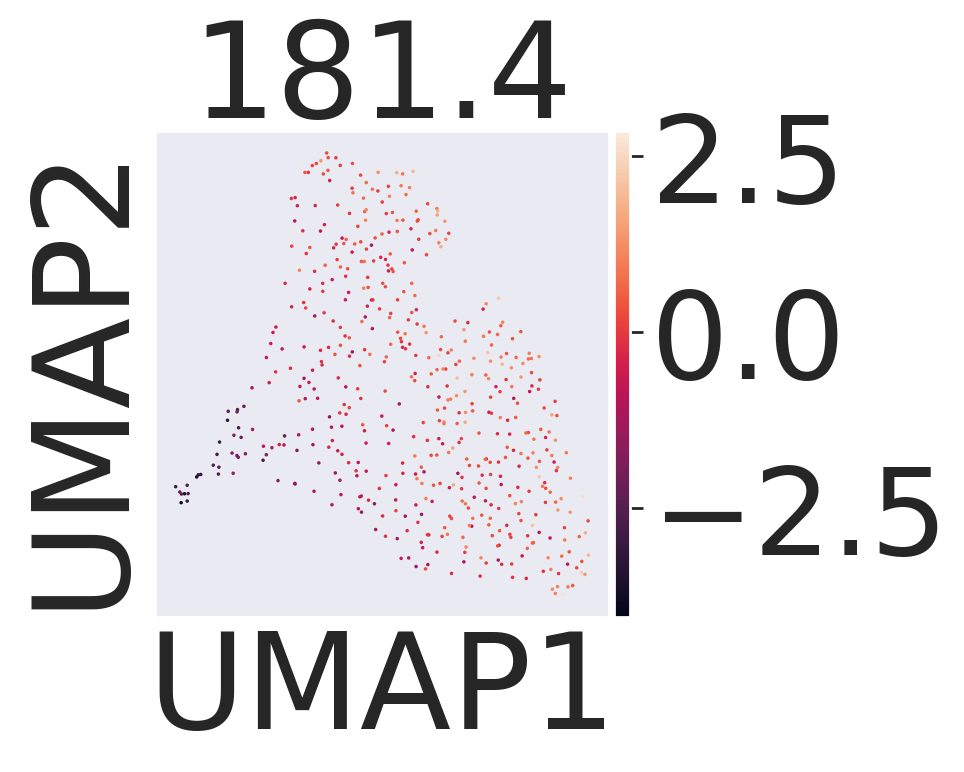

In [206]:
sc.tl.umap(a)
sc.pl.umap(a, color=['181.4'],s=10)
sc.tl.louvain(a)


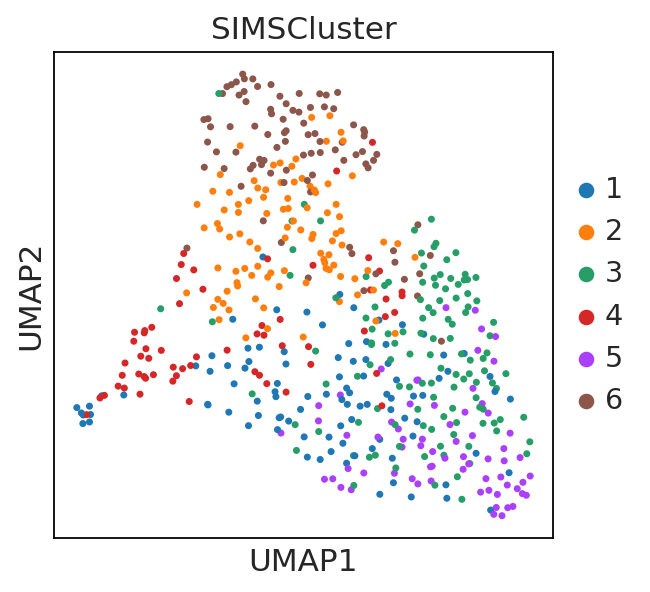

In [269]:
sc.pl.umap(a, color=['SIMSCluster'],size=40)

In [172]:
np.unique(a.obs['pred'])

array(['CV Hepatocytes', 'Endothelia cells', 'Hepatocytes'], dtype=object)

ranking genes
    finished (0:00:00)


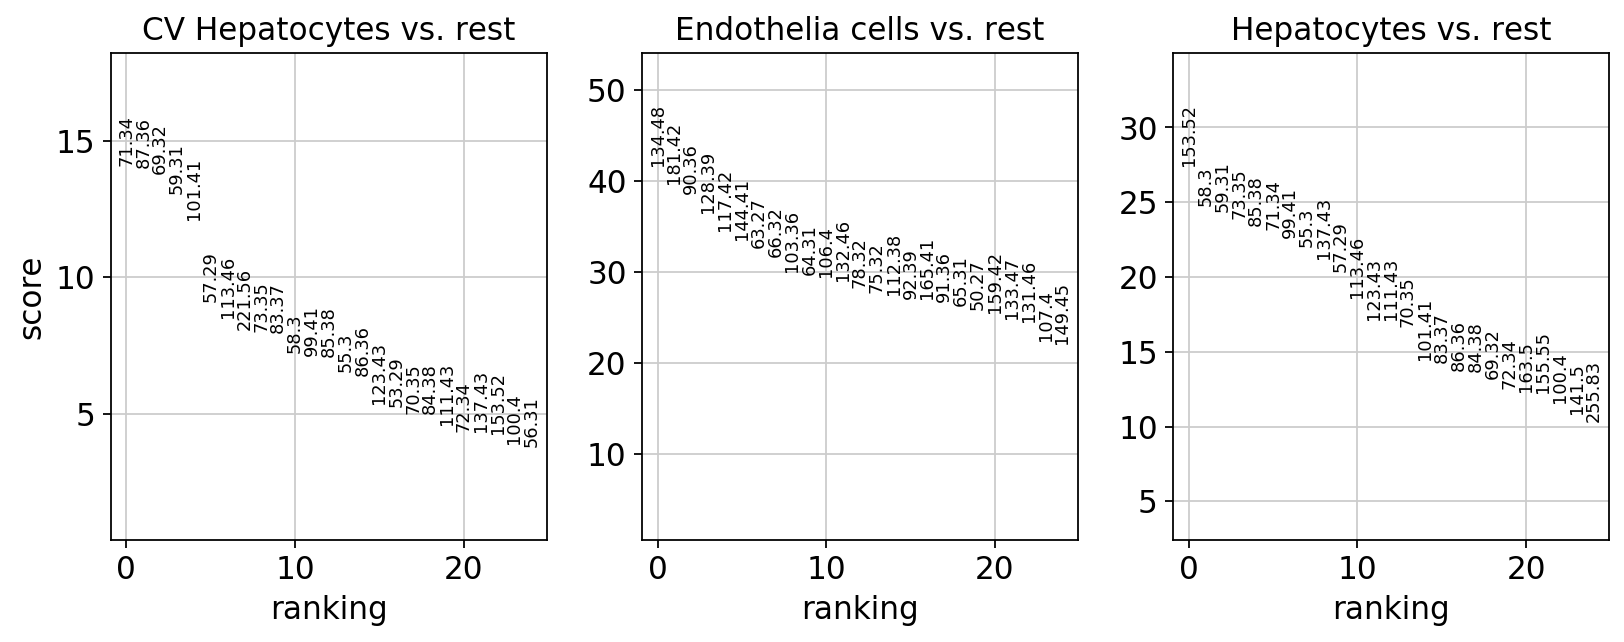

In [174]:
sc.tl.rank_genes_groups(a, 'pred', method='t-test')
sc.pl.rank_genes_groups(a, n_genes=25, sharey=False)

In [214]:
sc.settings.set_figure_params(dpi=80)

In [241]:
a.uns['SIMSCluster_colors']

['#1f77b4', '#ff7f0e', '#279e68', '#d62728']

In [178]:
a.uns['rank_genes_groups']

{'params': {'groupby': 'pred',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': True,
  'corr_method': 'benjamini-hochberg'},
 'scores': rec.array([(14.097475  , 41.71881   , 27.462917 ),
            (14.021464  , 39.724426  , 24.737885 ),
            (13.802093  , 38.605156  , 24.32874  ),
            (13.043484  , 36.55106   , 23.912313 ),
            (12.11955   , 34.552265  , 23.404894 ),
            ( 9.109975  , 33.57466   , 23.162514 ),
            ( 8.518998  , 32.68113   , 22.59797  ),
            ( 8.087614  , 31.699965  , 22.03619  ),
            ( 8.02046   , 30.065855  , 21.221571 ),
            ( 7.984117  , 29.699816  , 20.373173 ),
            ( 7.233115  , 29.470884  , 18.611475 ),
            ( 7.124984  , 29.095516  , 17.162971 ),
            ( 7.0854654 , 28.304901  , 17.159672 ),
            ( 6.545282  , 27.755957  , 16.688456 ),
            ( 6.408175  , 27.47593   , 14.4862995),
            ( 5.3827457 , 27.073479  , 14.284476 ),
            ( 5.2425056

In [196]:
sc.settings.figdir = 'figures/Fig2'

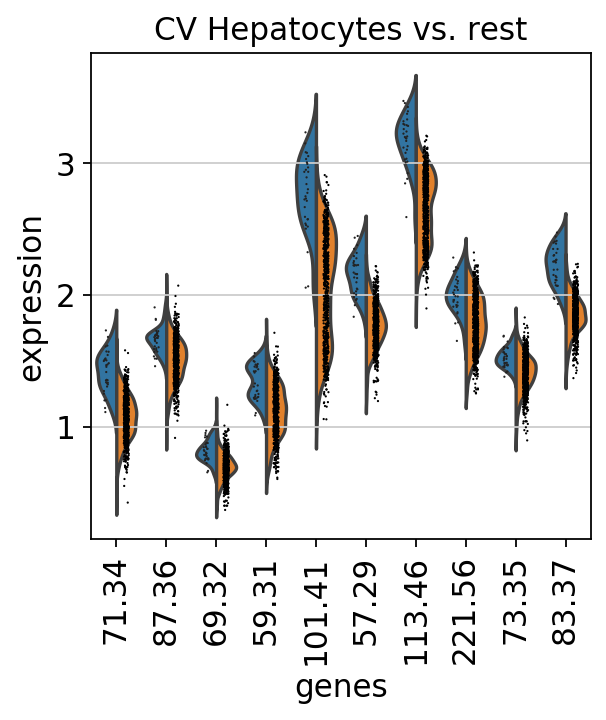

In [197]:
save_violin = 'violin.pdf'
sc.pl.rank_genes_groups_violin(a, groups='CV Hepatocytes', n_genes=10,save=save_violin)

In [183]:
a

AnnData object with n_obs × n_vars = 724 × 244 
    obs: 'pred', 'Mouse liver clustering'
    uns: 'rep_list', 'neighbors', 'pred_colors', 'rank_genes_groups', 'Mouse liver clustering_colors', 'dendrogram_pred'
    obsm: 'X_umap', 'X_pca'

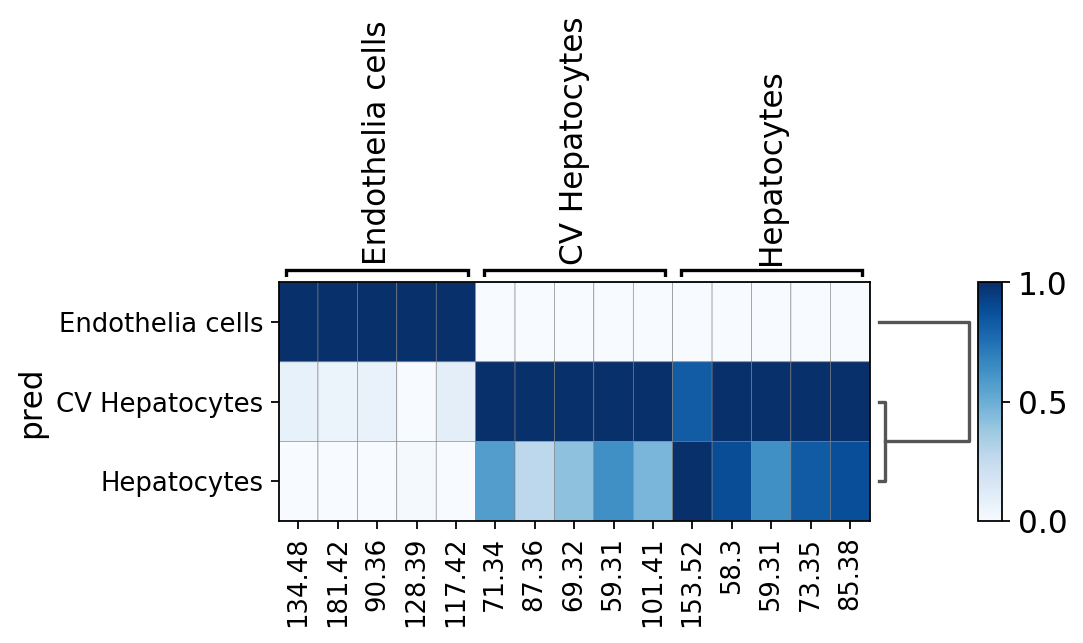

In [187]:
sc.pl.rank_genes_groups_matrixplot(a, n_genes=5,groupby='pred',standard_scale='var', cmap='Blues')

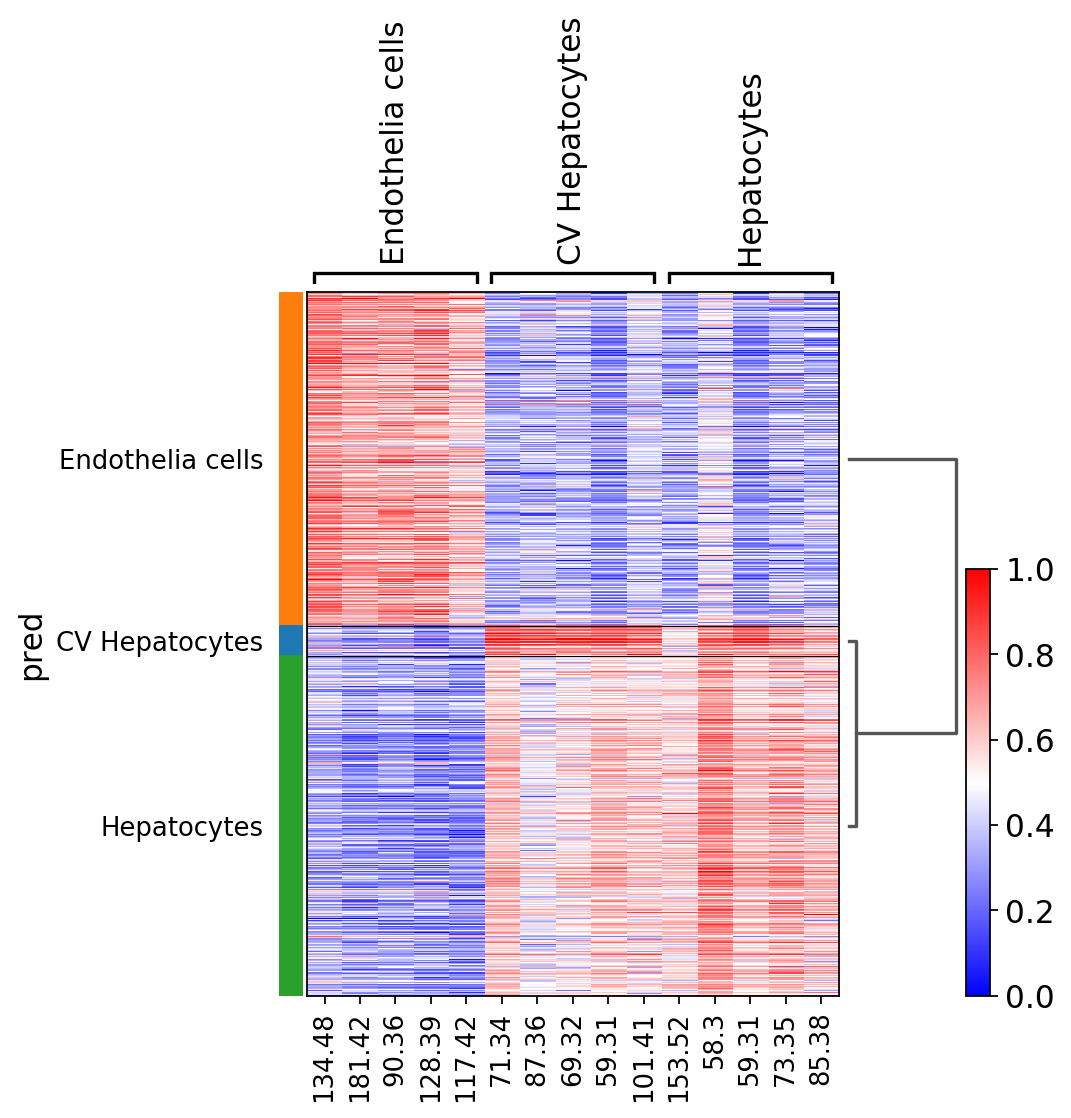

In [198]:
sc.pl.rank_genes_groups_heatmap(a, n_genes=5,groupby='pred',standard_scale='var', cmap='bwr',save='.pdf')

In [202]:
a.write('figures/Fig2/fig2.h5ad')

In [243]:
# %matplotlib inline
import matplotlib.pyplot as plt
# uh_pred = hdbscan.HDBSCAN(min_cluster_size=30).fit_predict(rep_embed)
# pred_y = np.ones(shape=(np.max(cell_idx)))
# pred_y = KMeans(3).fit_predict(sim_mat_bak)
# pred_y = SIMLR(sim_mat_bak,-8)
# pred_y = SpectralClustering(4,affinity='precomputed').fit_predict(sim_mat_order_bak)
# pred_y = AgglomerativeClustering(4,affinity='precomputed',linkage='complete').fit_predict(1/(input_sim_mat+1))
def plot_label_image(pred_y,cmp,save=None,mask=None):
    to_labeling_pred_y = np.array(pred_y)
    # to_labeling_pred_y[coc[448,:]>0]=3
    # to_labeling_pred_y = resultsLWEA[:,2]
    # to_labeling_pred_y = label_list_FF[2]
    # to_labeling_pred_y = label_list[3]
    # to_labeling_pred_y[mark_list]=2
#     cluster_cmp = sns.hls_palette(np.unique(to_labeling_pred_y).shape[0])
    unique_cls = np.unique(pred_y).shape[0]
    cluster_cmp = cmp.copy()
    
    if mask is not None:
        for to_mask in range(unique_cls):
            if to_mask==mask:
                continue
            cluster_cmp[to_mask]='k'
    labeling_plot_cmp = ['k']
    labeling_plot_cmp.extend(cluster_cmp)
    labeling = get_labeling(to_labeling_pred_y-np.min(to_labeling_pred_y),cell_idx,cell_pos)
    # labeling[labeling==5]=0
    img1 = labeling.reshape((256,256))
    plt.figure(figsize=(5,5))
    # plt.imshow(img1)
    ticks=np.arange(np.min(img1)+1,np.max(img1)+1)
    boundaries = np.arange(np.min(img1)+0.5,np.max(img1)+1.5)
#     with sns.plotting_context(font_scale=font_scale):
    sns.heatmap(img1,cmap=labeling_plot_cmp,linewidths=0,linecolor='k',square=True,cbar_kws={"ticks":ticks, "boundaries":boundaries,'fraction':0.046,'pad':0.04})
    # sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,ad':0.04})
#     plt.legend(fontsize=font_size)
    plt.xticks([])
    plt.yticks([])
    if save is not None:
        plt.savefig(save,transparent=False,format='pdf',bbox_inches='tight')

#     for i in range(num_cells):
#         cur_idx = i + 1
#         cur_ind = cell_pos[cell_idx==cur_idx][0]
#     #     print(ind2ij(cur_ind,256,0))
#     #     print(ind2ij(cur_ind,256,1))

#         plt.annotate(str(cur_idx-1),(ind2ij(cur_ind,256,1),ind2ij(cur_ind,256,0)),color='red')


    plt.show()

In [247]:
np.unique(a.obs['SIMLR'].astype('int'))

array([1, 2, 3])

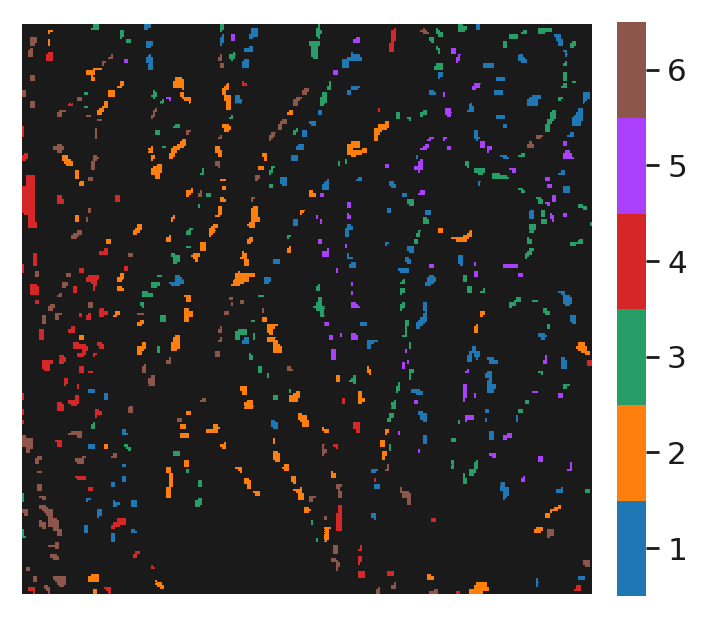

In [271]:
plot_label_image(a.obs['SIMSCluster'].astype('int'),a.uns['SIMSCluster_colors'])

In [ ]:
use_sample = test_sample_all
plt.figure(figsize=(10,10))
pd_dict = {}
pd_dict[58.35] = use_sample[:,matter_list==58.35][:,0]
pd_dict[125.37] = use_sample[:,matter_list==125.37][:,0]
pd_dict[86.46] = use_sample[:,matter_list==86.46][:,0]

a = np.arange(65536)
a[cell_pos] = -1
a[a!=-1] = 0

pd_dict['hue'] = -a
# 1表示在核内，否则0
pd_df = pd.DataFrame(pd_dict)
sns.pairplot(pd_df,size=10,hue='hue')
plt.show()

In [6]:
matter_list

array([ 50.27,  50.83,  51.29,  52.29,  53.29,  54.32,  55.3 ,  56.31,
        57.29,  58.3 ,  59.31,  60.26,  60.86,  61.28,  62.29,  63.27,
        63.88,  64.31,  65.31,  66.32,  67.34,  68.34,  69.32,  70.35,
        71.34,  72.34,  73.35,  74.33,  75.32,  76.29,  77.31,  78.32,
        79.29,  80.3 ,  81.33,  82.37,  83.37,  84.38,  85.38,  86.36,
        87.36,  88.36,  89.37,  90.36,  91.36,  92.39,  93.39,  94.39,
        95.38,  96.37,  97.36,  98.4 ,  99.41, 100.4 , 101.41, 102.35,
       103.36, 104.39, 105.38, 106.4 , 107.4 , 108.43, 109.43, 110.41,
       111.43, 112.38, 113.46, 114.44, 115.44, 116.43, 117.42, 118.43,
       119.41, 120.42, 121.42, 122.43, 123.43, 124.45, 125.47, 126.45,
       127.47, 128.39, 129.47, 130.46, 131.46, 132.46, 133.47, 134.48,
       135.46, 136.41, 137.43, 138.46, 139.47, 140.48, 141.5 , 142.47,
       143.43, 144.41, 145.45, 146.45, 147.47, 148.47, 149.45, 150.5 ,
       151.49, 152.49, 153.52, 154.53, 155.55, 156.53, 157.49, 158.46,
      

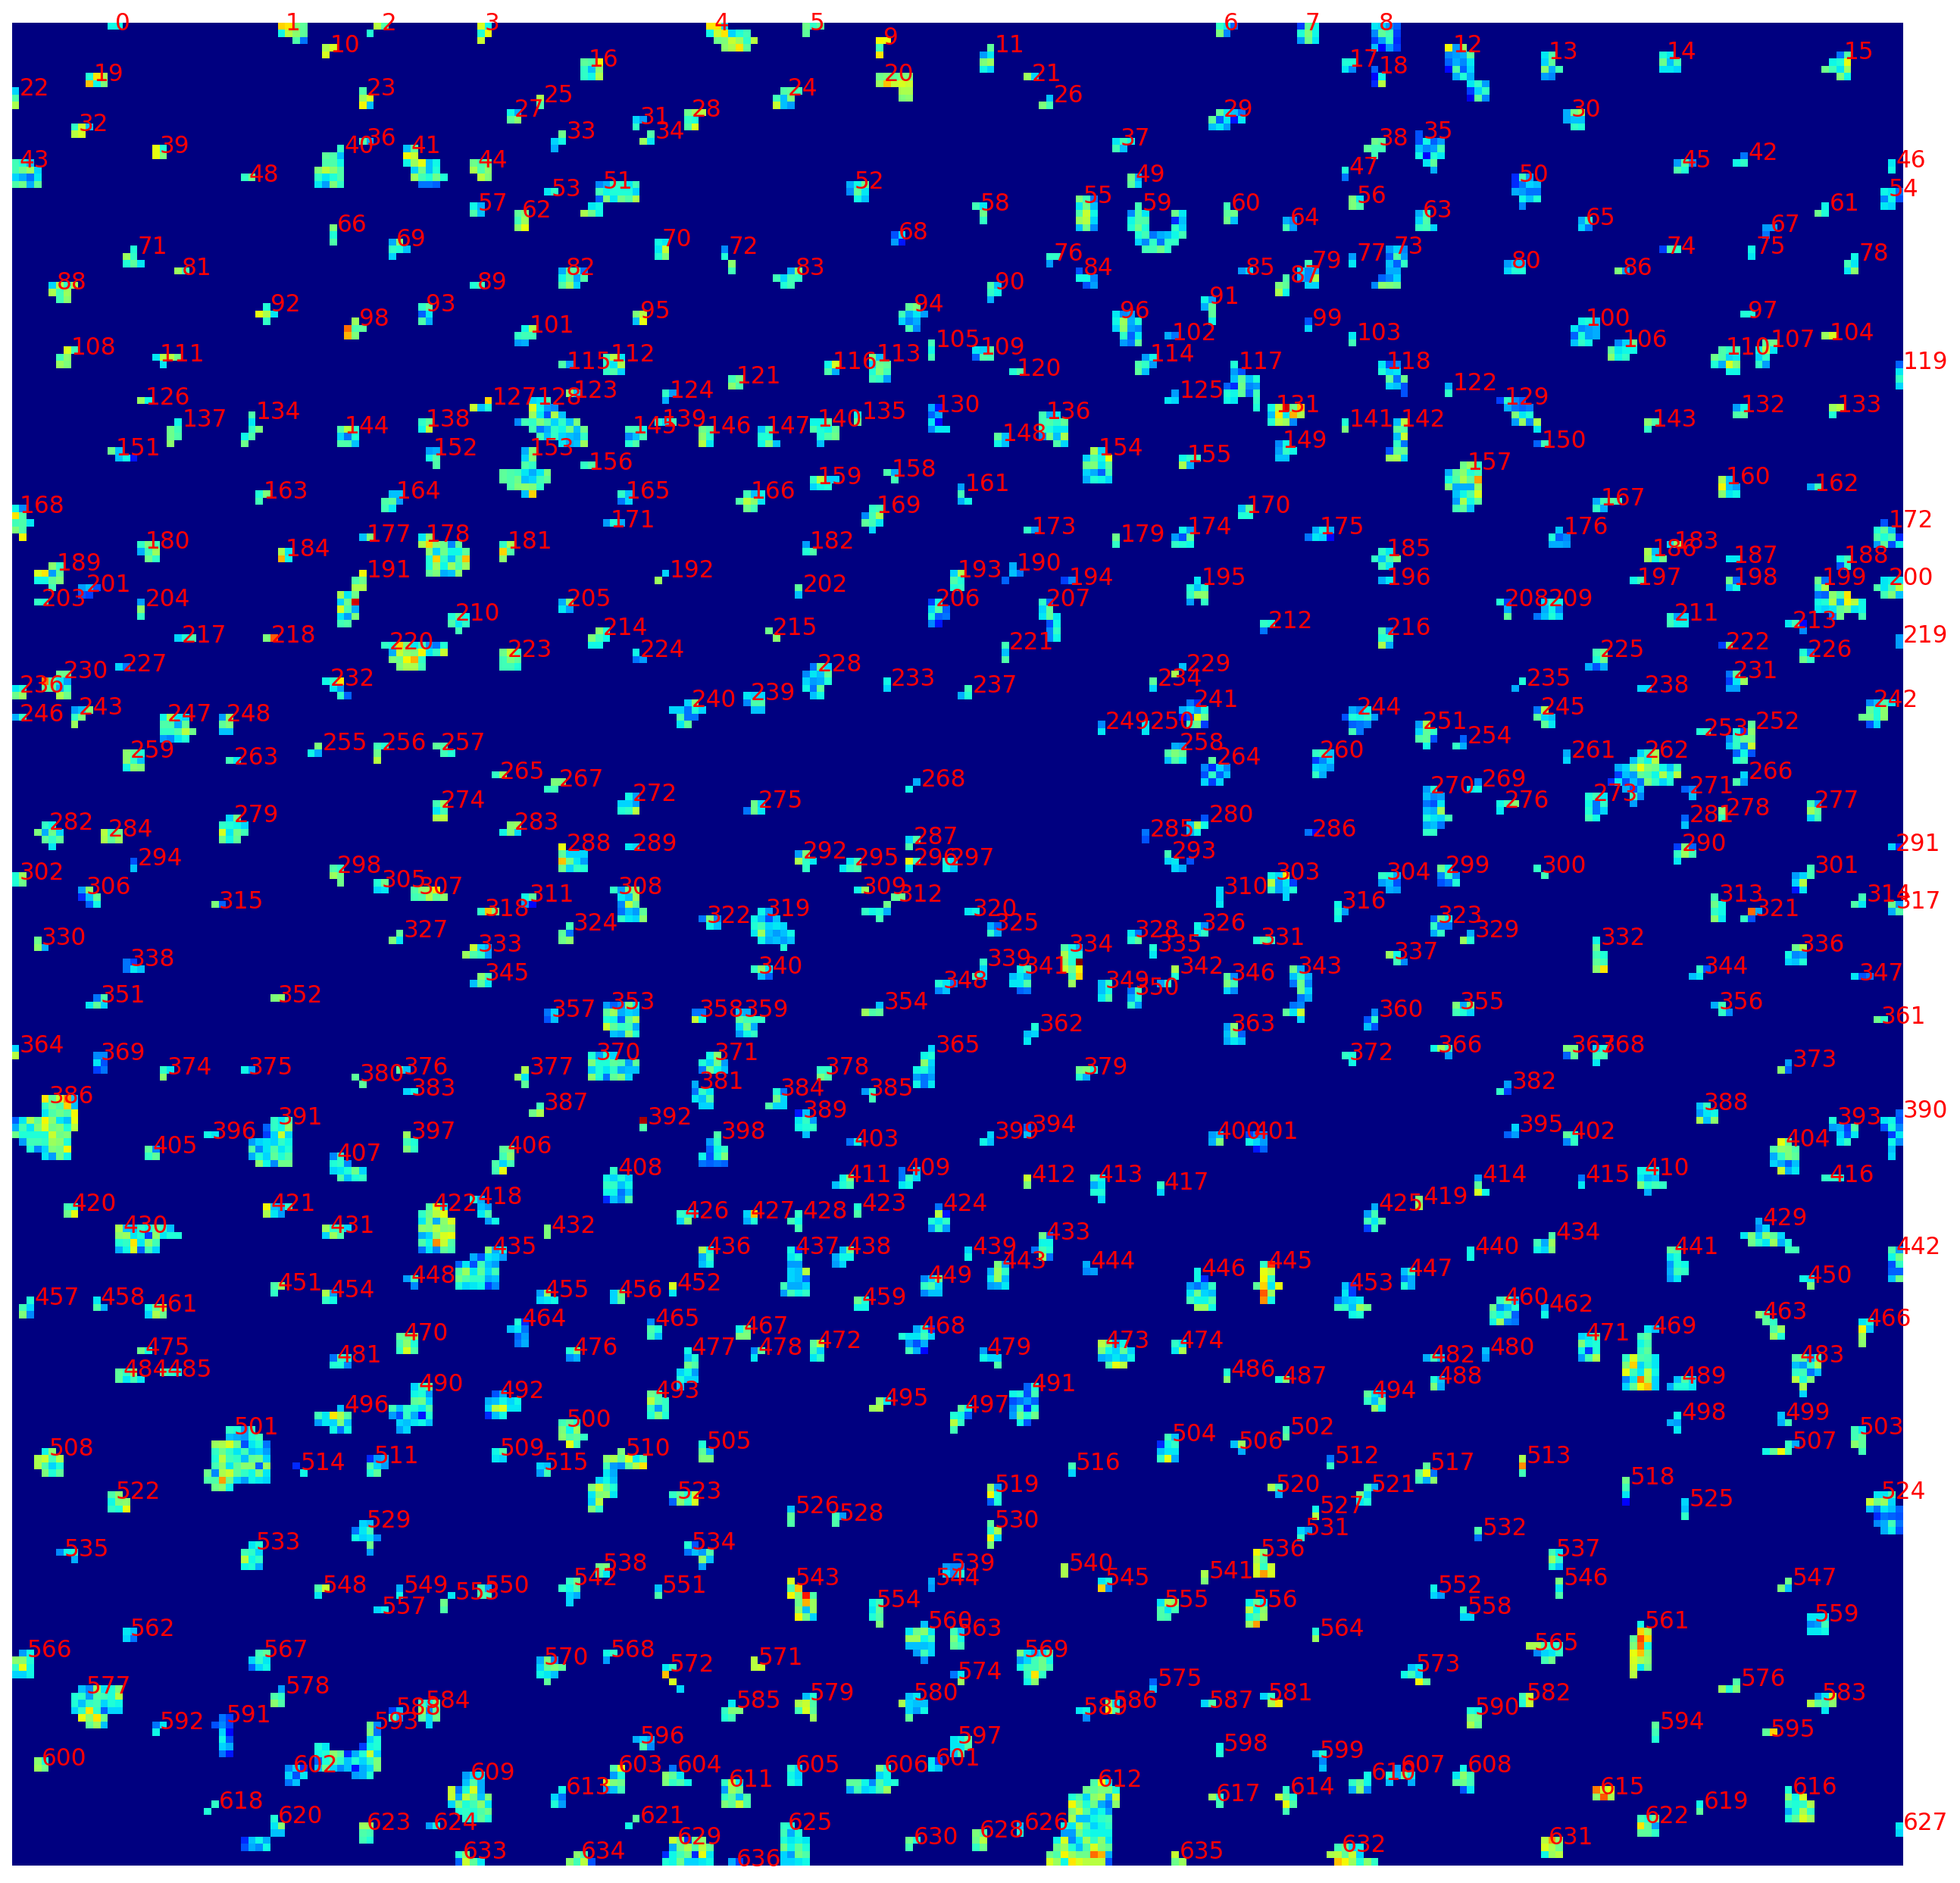

In [225]:
# to_show_x = train_x[:,np.where(matter_list==115.35)]
# to_show_x = train_x[:,matter_list==255.21][:,0]
# to_show_x = train_x[:,matter_list==87.36][:,0]
# to_show_x = train_x_HEG[:,9]
# train_x_preprocess = (train_x)/np.sum(train_x,axis=1,keepdims=True)

to_show_x = train_x[:,matter_list==87.49][:,0]

# to_show_x = train_x_preprocess[:,0]
# to_show_x = order_mat[391,:]

plt.figure(figsize=(20,20))
to_show_img = np.zeros(shape=65536,)
to_show_img[cell_pos-1] = to_show_x
to_show_img=to_show_img.reshape(256,256)
# plt.imshow(to_show_img,cmap='jet')
sns.heatmap(to_show_img,cmap='jet',cbar=False)
for i in range(num_cells):
    cur_idx = i + 1
    cur_ind = cell_pos[cell_idx==cur_idx][0]
#     print(ind2ij(cur_ind,256,0))
#     print(ind2ij(cur_ind,256,1))
    
    plt.annotate(str(cur_idx-1),(ind2ij(cur_ind,256,1),ind2ij(cur_ind,256,0)),color='red')
# plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
mark_list = []

In [ ]:

interest_matter_list=matter_list[matter_y==1]
images = list(map(get_img,interest_matter_list))
titles = list(map(lambda x:'{0} m/z'.format(str(x)),interest_matter_list))
# each_split = int(np.ceil(len(images)/n_splits))
each_split = 5
n_splits = int(np.ceil(len(images)/each_split))
for i in range(n_splits):
    show_range = slice(i*each_split,min((i+1)*each_split,len(images)))
    show_images(images=images[show_range],titles=titles[show_range],cmps='jet') 

In [ ]:

interest_matter_list=matter_list[matter_y==2]
images = list(map(get_img,interest_matter_list))
titles = list(map(lambda x:'{0} m/z'.format(str(x)),interest_matter_list))
# each_split = int(np.ceil(len(images)/n_splits))
each_split = 5
n_splits = int(np.ceil(len(images)/each_split))
for i in range(n_splits):
    show_range = slice(i*each_split,min((i+1)*each_split,len(images)))
    show_images(images=images[show_range],titles=titles[show_range],cmps='jet') 

In [ ]:

interest_matter_list=matter_list[matter_y==3]
images = list(map(get_img,interest_matter_list))
titles = list(map(lambda x:'{0} m/z'.format(str(x)),interest_matter_list))
# each_split = int(np.ceil(len(images)/n_splits))
each_split = 5
n_splits = int(np.ceil(len(images)/each_split))
for i in range(n_splits):
    show_range = slice(i*each_split,min((i+1)*each_split,len(images)))
    show_images(images=images[show_range],titles=titles[show_range],cmps='jet') 

In [ ]:

num_features = train_x.shape[1]
train_x_use = train_x
cell_pixel_dict = {}
pixel_count = []
for i in range(num_cells):
    cur_pixels = train_x_use[cell_idx==i+1,:]
    cell_pixel_dict[i] = cur_pixels
    pixel_count.append(cur_pixels.shape[0])

In [ ]:

# 设计SSA:
# 输入：两个np:分别代表长度不同的两个细胞，用哪种distance
# 输出：similarity
def SSA(i,j):
    ep = 1e-8
    cell_1 = cell_pixel_dict[i]
    cell_2 = cell_pixel_dict[j]
    dist_type = 'l1'
    dist_mat = cdist(cell_1,cell_2,'euclidean')
    exp_dist_mat = np.exp(-dist_mat)
    alpha_mat = exp_dist_mat/(np.sum(exp_dist_mat,axis=1,keepdims=1)+ep)
    beta_mat = exp_dist_mat/(np.sum(exp_dist_mat,axis=0,keepdims=1)+ep)
    a_mat = alpha_mat+beta_mat-alpha_mat*beta_mat

    A = np.sum(a_mat)+ep
    s_mat = a_mat*dist_mat
    s = np.sum(s_mat)*(-1/A)
    return s

In [ ]:
# [404,443,428,430,448,449,450,463,464]

In [ ]:
SSA(443,463)

In [ ]:
SSA(443,404)

In [ ]:
SSA(443,1)

In [129]:
# c, num_clust, req_c = FINCH(rep_list[3], initial_rank=None, req_clust=None, distance='correlation', verbose=True)
c, num_clust, req_c = FINCH(coc, initial_rank=None, req_clust=None, distance='cosine', verbose=True)

Partition 0: 157 clusters
Partition 1: 34 clusters
Partition 2: 12 clusters
Partition 3: 11 clusters


In [37]:
test_sample_all_minmax = MinMaxScaler().fit_transform(test_sample_all)

In [64]:
c, num_clust, req_c = FINCH(test_sample_all_minmax, initial_rank=None, req_clust=None, distance='euclidean', verbose=True)

Partition 0: 1525 clusters


/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


Partition 1: 38 clusters


/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


Partition 2: 7 clusters


/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


Partition 3: 3 clusters


/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:


In [50]:
c[:,3][:,None].min()

0

In [60]:
len(cluster_cmp)

8

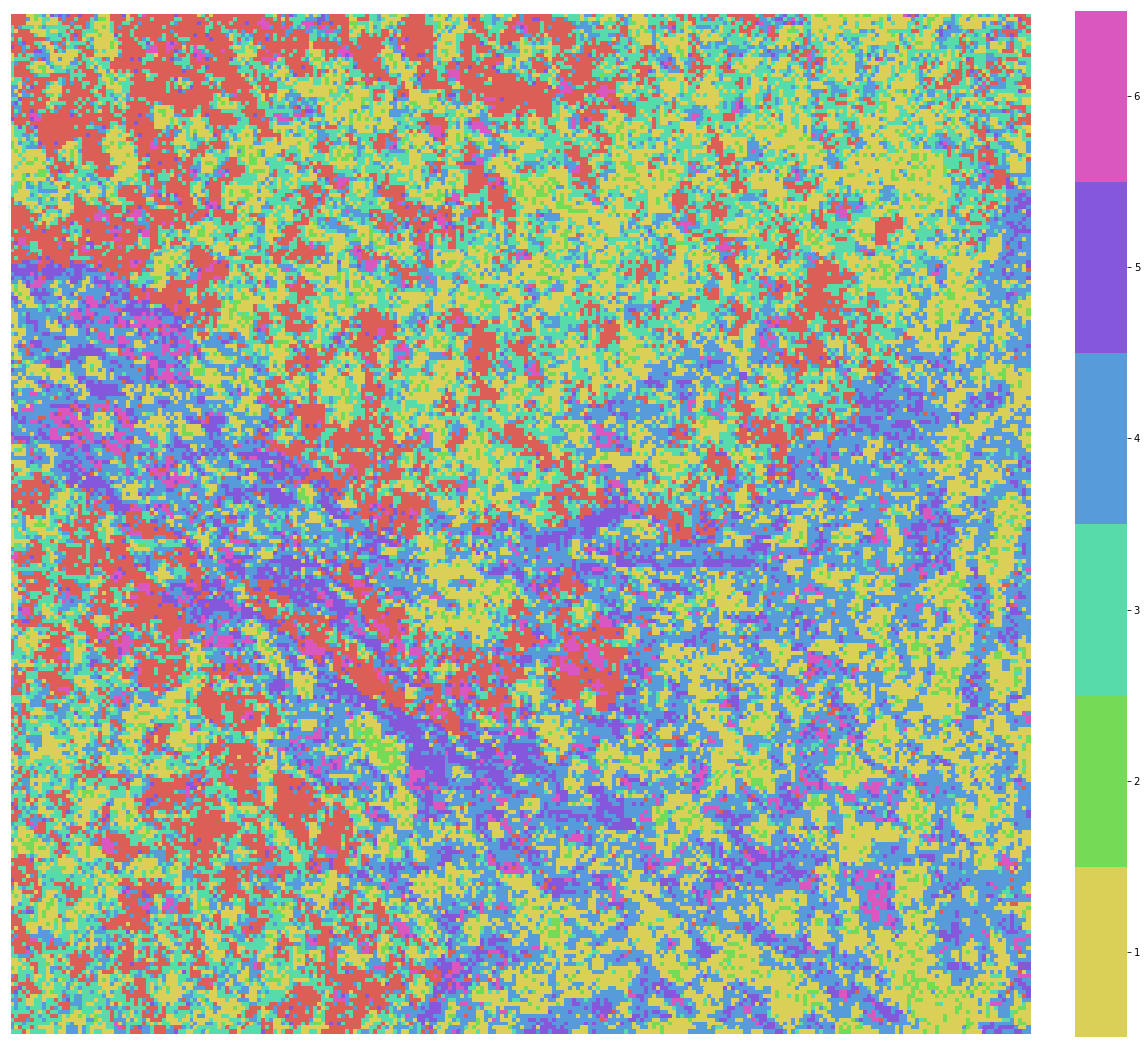

In [69]:
labeling = c[:,2][:,None]
cluster_cmp = sns.hls_palette(np.unique(labeling).shape[0])

# labeling = get_labeling(to_labeling_pred_y-np.min(to_labeling_pred_y),cell_idx,cell_pos)
# labeling[labeling==5]=0
img1 = labeling.reshape((256,256))
plt.figure(figsize=(20,20))
# plt.imshow(img1)
ticks=np.arange(np.min(img1)+1,np.max(img1)+1)
boundaries = np.arange(np.min(img1)+0.5,np.max(img1)+1.5)
sns.heatmap(img1,cmap=cluster_cmp,square=True,cbar_kws={"ticks":ticks, "boundaries":boundaries,'fraction':0.046,'pad':0.04})
# sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,ad':0.04})

plt.xticks([])
plt.yticks([])
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_cluster.pdf',transparent=True,format='pdf',bbox_inches='tight')


    
plt.show()

In [ ]:
SSA_dist = np.zeros(shape=(num_cells,num_cells))
for i in range(num_cells):
    for j in range(num_cells):
        SSA_dist[i,j] = SSA(i,j)

In [64]:
def check_symmetric(a, tol=1e-8):
    return np.all(np.abs(a-a.T) < tol)

In [7]:
def get_coc(sentences):
#     输入每行一个句子
#     sentences不能是sparse
    
    cooccurrence_matrix = np.dot(sentences.T,sentences)
    cooccurrence_matrix_diagonal = np.diagonal(cooccurrence_matrix)
    with np.errstate(divide='ignore', invalid='ignore'):
        cooccurrence_matrix_percentage = np.nan_to_num(np.true_divide(cooccurrence_matrix, cooccurrence_matrix_diagonal[:, None]))
    return cooccurrence_matrix_percentage

In [328]:
knn=kneighbors_graph(input_rep,10,mode='connectivity',metric='cosine',include_self=True)
knn = knn.toarray()

In [329]:
a = np.where(knn==1)

In [334]:
a

(array([  0,   0,   0, ..., 695, 695, 695]),
 array([  0,   3,  38, ..., 642, 653, 695]))

In [335]:
b=a[1].reshape(input_rep.shape[0],10)

In [344]:
list(b)[0]

array([  0,   3,  38,  42,  67,  75,  90, 161, 533, 580])

In [6]:
def get_coc_network(rep,k):
#     先得到KNN
#     默认用cosine，最近k个为1，每一行为最近k个的index，所以非对称
    knn=kneighbors_graph(rep,k,mode='connectivity',metric='cosine',include_self=True)
#     根据knn：rare的IN少，common的IN多；但只能算出每个cell的score，无法聚类
    
#     根据knn，计算共出现
    knn = knn.toarray()
    coc=get_coc(knn)
    return coc
    
    
    
    

In [8]:
coc = get_coc_network(rep_list[0],10)

In [34]:
coc.shape

(696, 696)

In [32]:
edge_file = 'edge/edge_coc_k10_w_d'
with open(edge_file,'w') as f:
    for i in range(coc.shape[0]):
        for j in range(coc.shape[1]):
            to_write = '{i} {j} {weight}\n'
            to_write=to_write.format(i=i,j=j,weight=coc[i,j])
            f.write(to_write)

In [299]:
knn_trans = []
for i in range(knn.shape[0]):
    cur_row = knn[i,:]
    cur_trans = np.where(cur_row==1)
    cur_trans = list(cur_trans[0])
    knn_trans.append(cur_trans)
    

In [321]:
patterns = pyfpgrowth.find_frequent_patterns(knn_trans, 2)

In [322]:
rules = pyfpgrowth.generate_association_rules(patterns, 0.7)

In [71]:
input_rep.shape

(696, 5958)

In [96]:
def get_ith_neighbor(a,i,dist_order_mat):
    return dist_order_mat[a,i]
def get_b_order(a,b,dist_order_mat):
    return np.where(dist_order_mat[a,:]==b)[0][0]
def get_naive_rodist(cell_a,cell_b,dist_order_mat_naive):
    dab=0
    for i in range(1,get_b_order(cell_a,cell_b,dist_order_mat_naive)+1):
        cur_add = get_b_order(cell_b,get_ith_neighbor(cell_a,i,dist_order_mat_naive),dist_order_mat_naive)
        dab+=cur_add
    return dab
    

In [97]:
get_naive_rodist(404,404,dist_order_mat_naive)

0

In [98]:
min(2,3)

2

In [ ]:
rep = input_rep

dist_mat_naive = squareform(pdist(rep,'cosine'))
# 每一行是与该细胞距离从近到远的细胞 
dist_order_mat_naive = np.argsort(dist_mat_naive,axis=1)
cell_a = 428
cell_b = 448
rodist_mat_sym = np.zeros_like(dist_mat_naive)
rodist_mat_asy = np.zeros_like(dist_mat_naive)

for i in range(num_cells):
    for j in range(i+1,num_cells):
        cur_asy_ij = get_naive_rodist(i,j,dist_order_mat_naive)
        cur_asy_ji = get_naive_rodist(j,i,dist_order_mat_naive)
        Oab = get_b_order(i,j,dist_order_mat_naive)
        Oba = get_b_order(j,i,dist_order_mat_naive)
        cur_sym = (cur_asy_ij+cur_asy_ji)/min(Oab,Oba)
        rodist_mat_sym[i,j] = cur_sym
        rodist_mat_sym[j,i] = cur_sym
        rodist_mat_asy[i,j] = cur_asy_ij
        rodist_mat_asy[j,i] = cur_asy_ji
        print(i,j,rodist_mat_asy[i,j],rodist_mat_asy[j,i],rodist_mat_sym[i,j])
        
        
        
        
        


0 1 10288.0 63465.0 1024.3472222222222
0 2 8741.0 53332.0 985.2857142857143
0 3 110.0 1002.0 185.33333333333334
0 4 2863.0 2021.0 148.0
0 5 2082.0 24325.0 733.5277777777778
0 6 764.0 10369.0 695.8125
0 7 7552.0 33808.0 537.1428571428571
0 8 15372.0 108649.0 1494.2289156626507
0 9 68389.0 215987.0 1030.3478260869565
0 10 9426.0 424.0 1094.4444444444443
0 11 19464.0 84564.0 928.8214285714286
0 12 77097.0 206995.0 1164.311475409836
0 13 87539.0 229647.0 1215.272030651341
0 14 38881.0 191887.0 1296.4494382022472
0 15 45665.0 156739.0 861.2936170212766
0 16 83324.0 230261.0 1148.6630036630036
0 17 30247.0 181581.0 1491.7464788732395
0 18 2590.0 46098.0 1678.896551724138
0 19 34320.0 108509.0 797.927374301676
0 20 35272.0 81421.0 535.2889908256881
0 21 5881.0 50848.0 1090.9423076923076
0 22 86959.0 142841.0 621.081081081081
0 23 107704.0 220747.0 866.6253298153034
0 24 134136.0 234833.0 878.4976190476191
0 25 42524.0 146096.0 877.3023255813954
0 26 48137.0 199817.0 1073.3939393939395
0 27 76

array([[   0.        , 1024.34722222,  985.28571429, ..., 1341.56756757,
         312.5       ,  863.15542522],
       [1024.34722222,    0.        ,   65.        , ...,  191.28333333,
         722.38181818,  373.30434783],
       [ 985.28571429,   65.        ,    0.        , ...,  253.42537313,
         486.15328467,  342.94      ],
       ...,
       [1341.56756757,  191.28333333,  253.42537313, ...,    0.        ,
        1020.        ,  389.49681529],
       [ 312.5       ,  722.38181818,  486.15328467, ..., 1020.        ,
           0.        ,  582.03703704],
       [ 863.15542522,  373.30434783,  342.94      , ...,  389.49681529,
         582.03703704,    0.        ]])

In [124]:
rodist_mat_asy[0,448]

229854.0

In [125]:
rodist_mat_asy[448,0]

238853.0

In [369]:
to_labeling_pred_y.astype('int')

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1,

In [365]:
np.unique(to_labeling_pred_y.astype('int'),return_counts=1)

(array([1., 2., 3.]), array([291, 396,   9]))

In [85]:
c, num_clust, req_c = FINCH(rep_embed, initial_rank=None, req_clust=3, distance='euclidean', verbose=True)

Partition 0: 235 clusters
Partition 1: 83 clusters
Partition 2: 58 clusters


/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid this warning.
  if not x.flags.writeable:
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/scipy/sparse/lil.py:518: FutureWarning: future versions will not create a writeable array from broadcast_array. Set the writable flag explicitly to avoid th

In [234]:
# rep = rep_list[0]
# rep = rep_list[0]
# from sklearn.manifold import tsne
# #PCA预处理
# rep_preprocess = np.log(rep+1)
# rep_preprocess = rep_preprocess-rep_preprocess.mean(axis=0)
# U, s, V = np.linalg.svd(rep_preprocess, full_matrices=False)
# rep_preprocess = np.dot(U, np.diag(s))[:,:50]
#PCA预处理
# rep_preprocess = rep

# rep_preprocess = rep_list[0][:,0][:,None]

# rep_embed = umap.UMAP(n_neighbors=30,min_dist=0).fit_transform(rep_preprocess)
# rep_embed = fast_tsne(rep_preprocess,perplexity=20)

# input_sim = sim_mat_order
# input_dist = 1/(1+input_sim)

# input_dist = (sim_mat+np.transpose(sim_mat))/2
# input_dist = squareform(pdist(rep_list[4]))
# input_dist = input_sim_mat
input_rep = rep_list[0]
# input_rep = mean_profile_list_median

input_dist = squareform(pdist(input_rep,'cosine'))
# input_dist = rodist_mat_asy
# input_dist = -SSA_dist
# input_dist = 1-LWCM_np
# input_dist = dist_mat[list(matter_list).index(114.91),:,:]
# input_dist = test_mat
# input_dist = 1-A
# input_dist = sim_mat_median_sym
# input_dist = squareform(pdist(mean_profile_list_median))
# rep_embed = umap.UMAP(metric='precomputed',n_neighbors=30,n_components=2).fit_transform(input_dist,pseudo_y)
rep_embed = umap.UMAP(metric='precomputed',n_neighbors=30,n_components=2).fit_transform(input_dist)
# c, num_clust, req_c = FINCH(input_rep, initial_rank=None, req_clust=3, distance='cosine', verbose=True)
# rep_embed = phate.PHATE(knn=10, decay=100,knn_dist='precomputed').fit_transform(input_dist)
# rep_embed = TSNE(metric='precomputed').fit_transform(input_dist)
# pred_y = hdbscan.HDBSCAN(min_cluster_size=20,min_samples=5,metric='precomputed').fit_predict(input_dist)
# pred_y = KMeans(2).fit_predict(rep_embed)
# pred_y = pseudo_y
# pred_y = RMKKM(input_rep,3.0)
# [pred_y,A] = SLKE(rep_embed,2)
# [pred_y,A] = SSR(rep_embed,2)
# pred_y[mark_list]=np.max(pred_y)+1
# pred_y = pseudo_y
pred_y,A = SIMLR(input_rep,-8)
# pred_y = req_c
# pred_y = c[:,3]
# pred_y = label_list[0]
# pred_y = pred_y_DB
# pred_y = KMeans(4).fit_predict(rep_list[3])
cluster_cmp = sns.hls_palette(np.unique(pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
# mean_profile_list_median_preprocess = mean_profile_list_median-mean_profile_list_median.mean(axis=0)
# U, s, V = np.linalg.svd(mean_profile_list_median_preprocess, full_matrices=False)
# mean_profile_list_median_preprocess = np.dot(U, np.diag(s))[:,:50]
# umap_median_mean = umap.UMAP().fit_transform(mean_profile_list_median_preprocess)
# umap_median_mean = fast_tsne(mean_profile_list_median_preprocess,perplexity=50)
# fast_tsne(X50, perplexity=50, seed=42)

# X = X - X.mean(axis=0)
# U, s, V = np.linalg.svd(X, full_matrices=False)
# X50 = np.dot(U, np.diag(s))[:,:50]
# umap_median_mean = 
scatter_pd_data = {
    'x':[],
    'y':[],
    'i':[],
    
}
for i in range(num_cells):
    cur_x = rep_embed[i,0]
    cur_y = rep_embed[i,1]
    cur_idx = i
    scatter_pd_data['x'].append(cur_x)
    scatter_pd_data['y'].append(cur_y)
    scatter_pd_data['i'].append(cur_idx)
    for matter in matter_list:
        cur_profile = mean_profile_list_median[i,matter_list==matter][0]
#         print(cur_profile)
        if not scatter_pd_data.get(matter):
            scatter_pd_data[matter]=[cur_profile]
        else:
            scatter_pd_data[matter].append(cur_profile)

scatter_pd = pd.DataFrame(scatter_pd_data)
            
scatter_pd['mark'] = pd.Series(np.zeros(shape=(scatter_pd.shape[0])),index=scatter_pd.index)


# mark_list = [284,260,275,267,310,335,373,378,383,382,380,377,365,340,322,309,212,224,139,341,535,51,
# 303,232,212,188,213,200,346,634,535,693,691,442,25,28,2,233,234,298,278,302,428,450]
# fix
# mark_list = [391,403,376,397,357,367]

# liverfiber1
# mark_list = [404,443,428,430,448,449,450,463,464]

# liverfiber1
# mark_list = [404,443,428,448,449,463]
# mark_list = [404,443,428,448,449,463]

# SPE1
# mark_list = [140,146]


# lung
# mark_list=[155,138,145,156,139,131,136]


# for ml in mark_list:
#     scatter_pd.loc[scatter_pd.i==ml,['mark']]=1
         

In [111]:
import anndata as ad
import scanpy as sc
sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()

scanpy==1.4.3+56.g709bafb anndata==0.6.18 umap==0.3.2 numpy==1.17.3 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1


In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='x',y='y',hue=pred_y,data=scatter_pd,size_order=[1,0],palette=cluster_cmp,s=30)
sns.set(style='white')
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.legend()
plt.show()

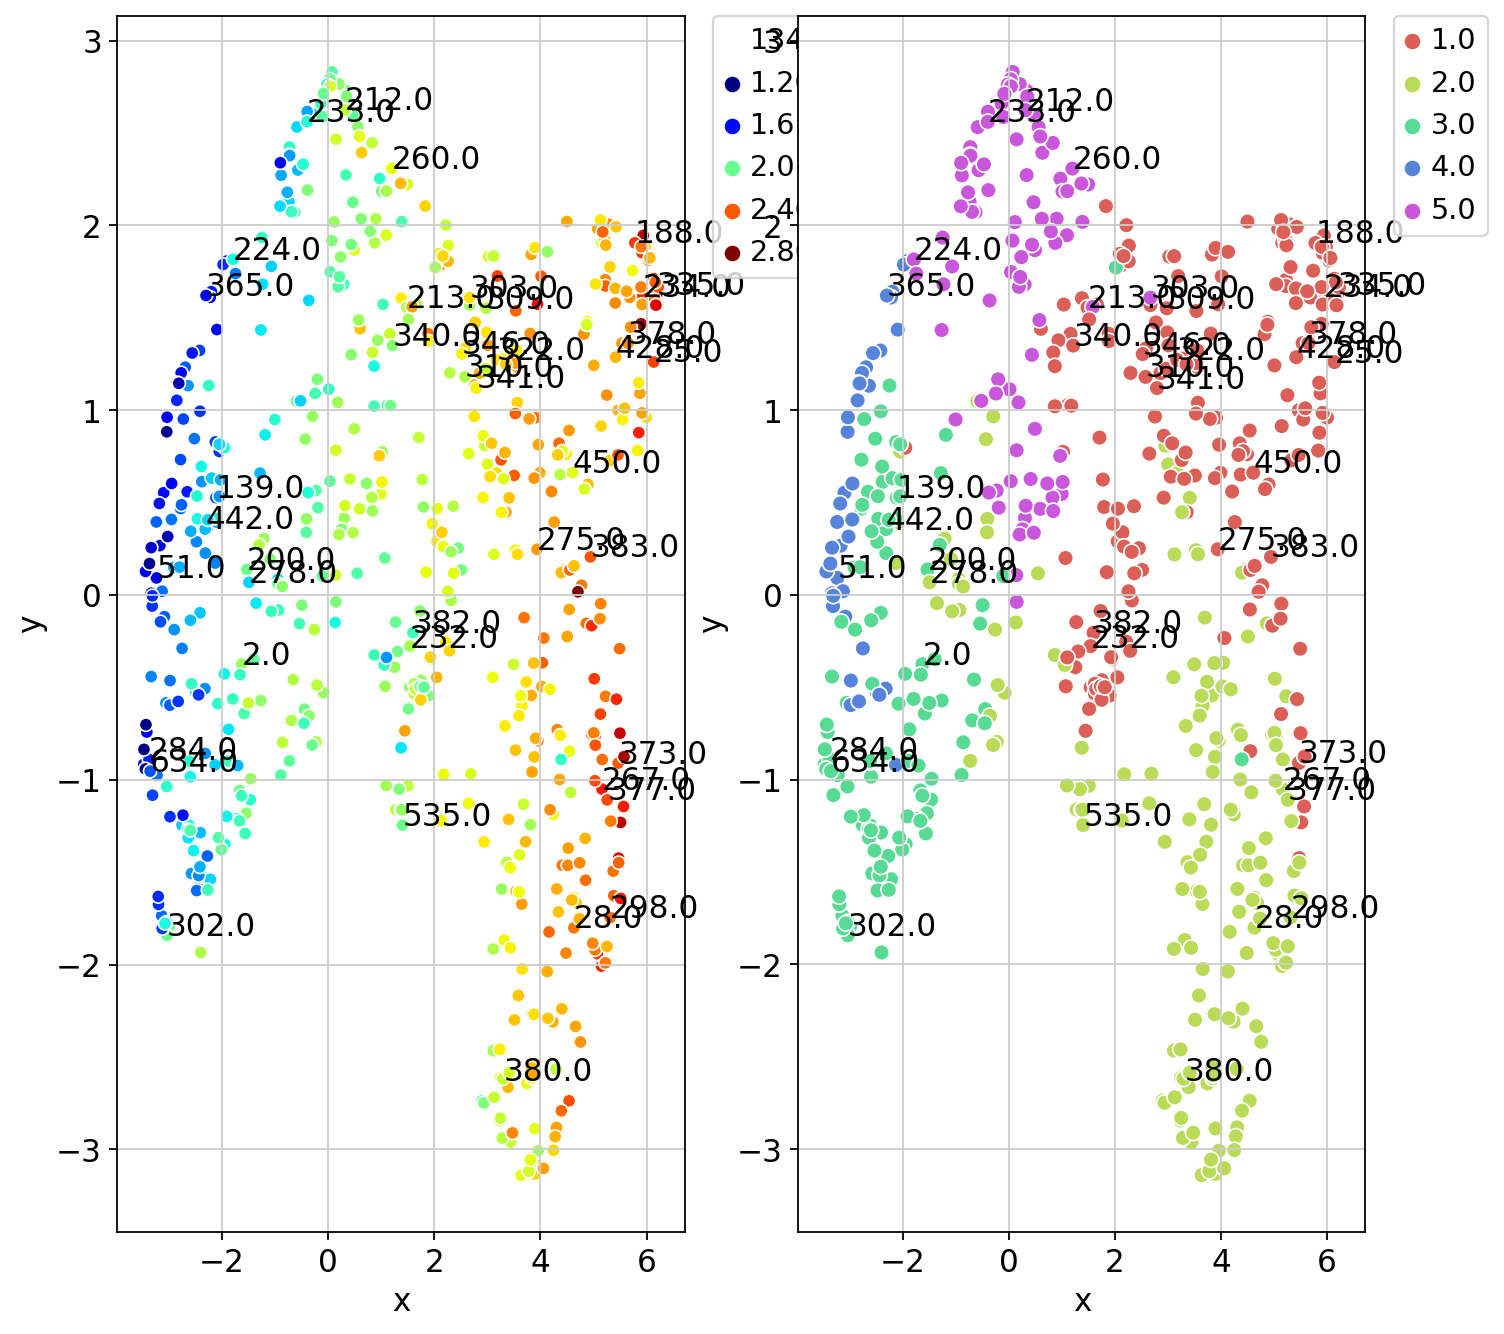

In [235]:
from importlib import reload
# reload(plt)
# %matplotlib notebook
# pred_y-=pred_y.min()
# pred_y[cell_area_list>=40]=-1
cluster_cmp = sns.hls_palette(np.unique(pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
# %matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
# %matplotlib notebook

plt.figure(figsize=(10,10))
# sns.scatterplot(x='x',y='y',hue='mark',data=scatter_pd,size='mark',size_order=[1,0])

# sns.scatterplot(x='x',y='y',hue=pred_y,data=scatter_pd,size='mark',size_order=[1,0],palette=cluster_cmp)
plt.subplot(1,2,1)

sns.scatterplot(x='x',y='y',hue=134.67,data=scatter_pd,size_order=[1,0],palette='jet')
# sns.scatterplot(x='x',y='y',hue=coc[428,:],data=scatter_pd,size_order=[1,0],s=50)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_umap.pdf',transparent=True,format='pdf',bbox_inches='tight')

for i,row in scatter_pd.iterrows():
    
    cur_idx = row['i']
    if cur_idx not in mark_list:
        continue
    cur_x = row['x']
    cur_y = row['y']
    plt.annotate(str(cur_idx),(cur_x,cur_y))
# plt.colorbar(use_gridspec=True)




plt.subplot(1,2,2)

# sns.scatterplot(x='x',y='y',hue=87.36,data=scatter_pd,size_order=[1,0],palette='jet')
sns.scatterplot(x='x',y='y',hue=pred_y,data=scatter_pd,size_order=[1,0],palette=cluster_cmp,s=50)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_umap.pdf',transparent=True,format='pdf',bbox_inches='tight')

for i,row in scatter_pd.iterrows():
    
    cur_idx = row['i']
    if cur_idx not in mark_list:
        continue
    cur_x = row['x']
    cur_y = row['y']
    plt.annotate(str(cur_idx),(cur_x,cur_y))
plt.show()

In [273]:
# pred_y_AP = AffinityPropagation(affinity='precomputed', verbose=False).fit_predict(coc)
# pred_y_SC = SpectralClustering(affinity='precomputed',n_clusters=5).fit_predict(coc)
pred_y_DB = DBSCAN(metric='precomputed').fit_predict(1-coc)

In [103]:
np.unique(pred_y)

array([1., 2., 3.])

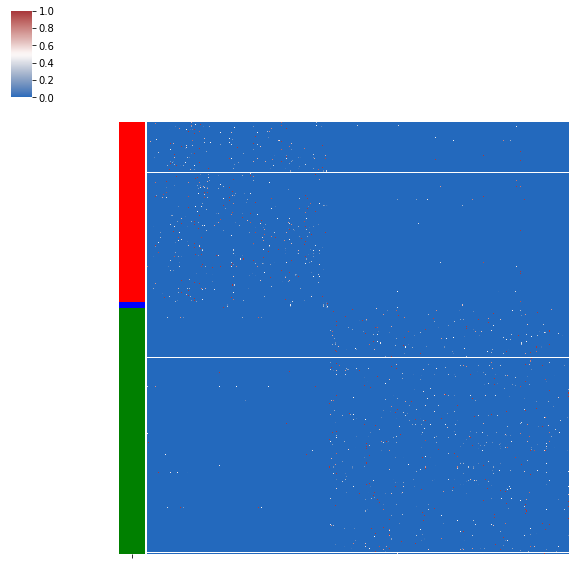

In [115]:
# input_dist = squareform(pdist(mean_profile_list_median,'correlation'))
# mean_profile_list_median

input_dist=rodist_mat_sym.copy()
# input_dist=1
input_dist[coc<0.5]=0

show_mat = input_dist

show_label = pred_y
show_label[pred_y==2]=3
show_label[mark_list]=2
cluster_cmp = sns.hls_palette(np.unique(show_label).shape[0])

label_argsort = np.argsort(show_label)
label_sort = np.sort(show_label)
show_mat = show_mat[:,label_argsort][label_argsort,:]

figsize=(20,20)
# col_colors = label_sort

# lut = dict(zip(set(label_sort),cluster_cmp))
# col_colors = pd.DataFrame(label_sort)[0].map(lut)
label_sort=pd.Series(label_sort)
lut = dict(zip(label_sort.unique(), "rbg"))
row_colors = label_sort.map(lut)
# n = 629
g=sns.clustermap(row_colors=row_colors,col_cluster=False,row_cluster=False,data=pd.DataFrame(show_mat),cmap="vlag",standard_scale=0,square=False,yticklabels=False,xticklabels=False)
plt.show()

In [ ]:
np.unique(pred_y,return_counts=1)

In [ ]:
pseudo_y = pred_y.copy()

In [ ]:
class_1 = np.where(pseudo_y==1)

In [ ]:
class_2 = [284,260,275,267,310,335,373,378,383,382,380,377,365,340,322,309,212,224,139,341,535,51,
303,232,212,188,213,200,346,634,535,693,691,442,25,28,2,233,234,298,278,302,428,450]

In [ ]:
pseudo_y = np.ones_like(pred_y)*3
pseudo_y[class_1]=1
pseudo_y[class_2]=2

In [256]:
pred_y_new = np.ones_like(pred_y)
pred_y_new[pred_y==1]=2

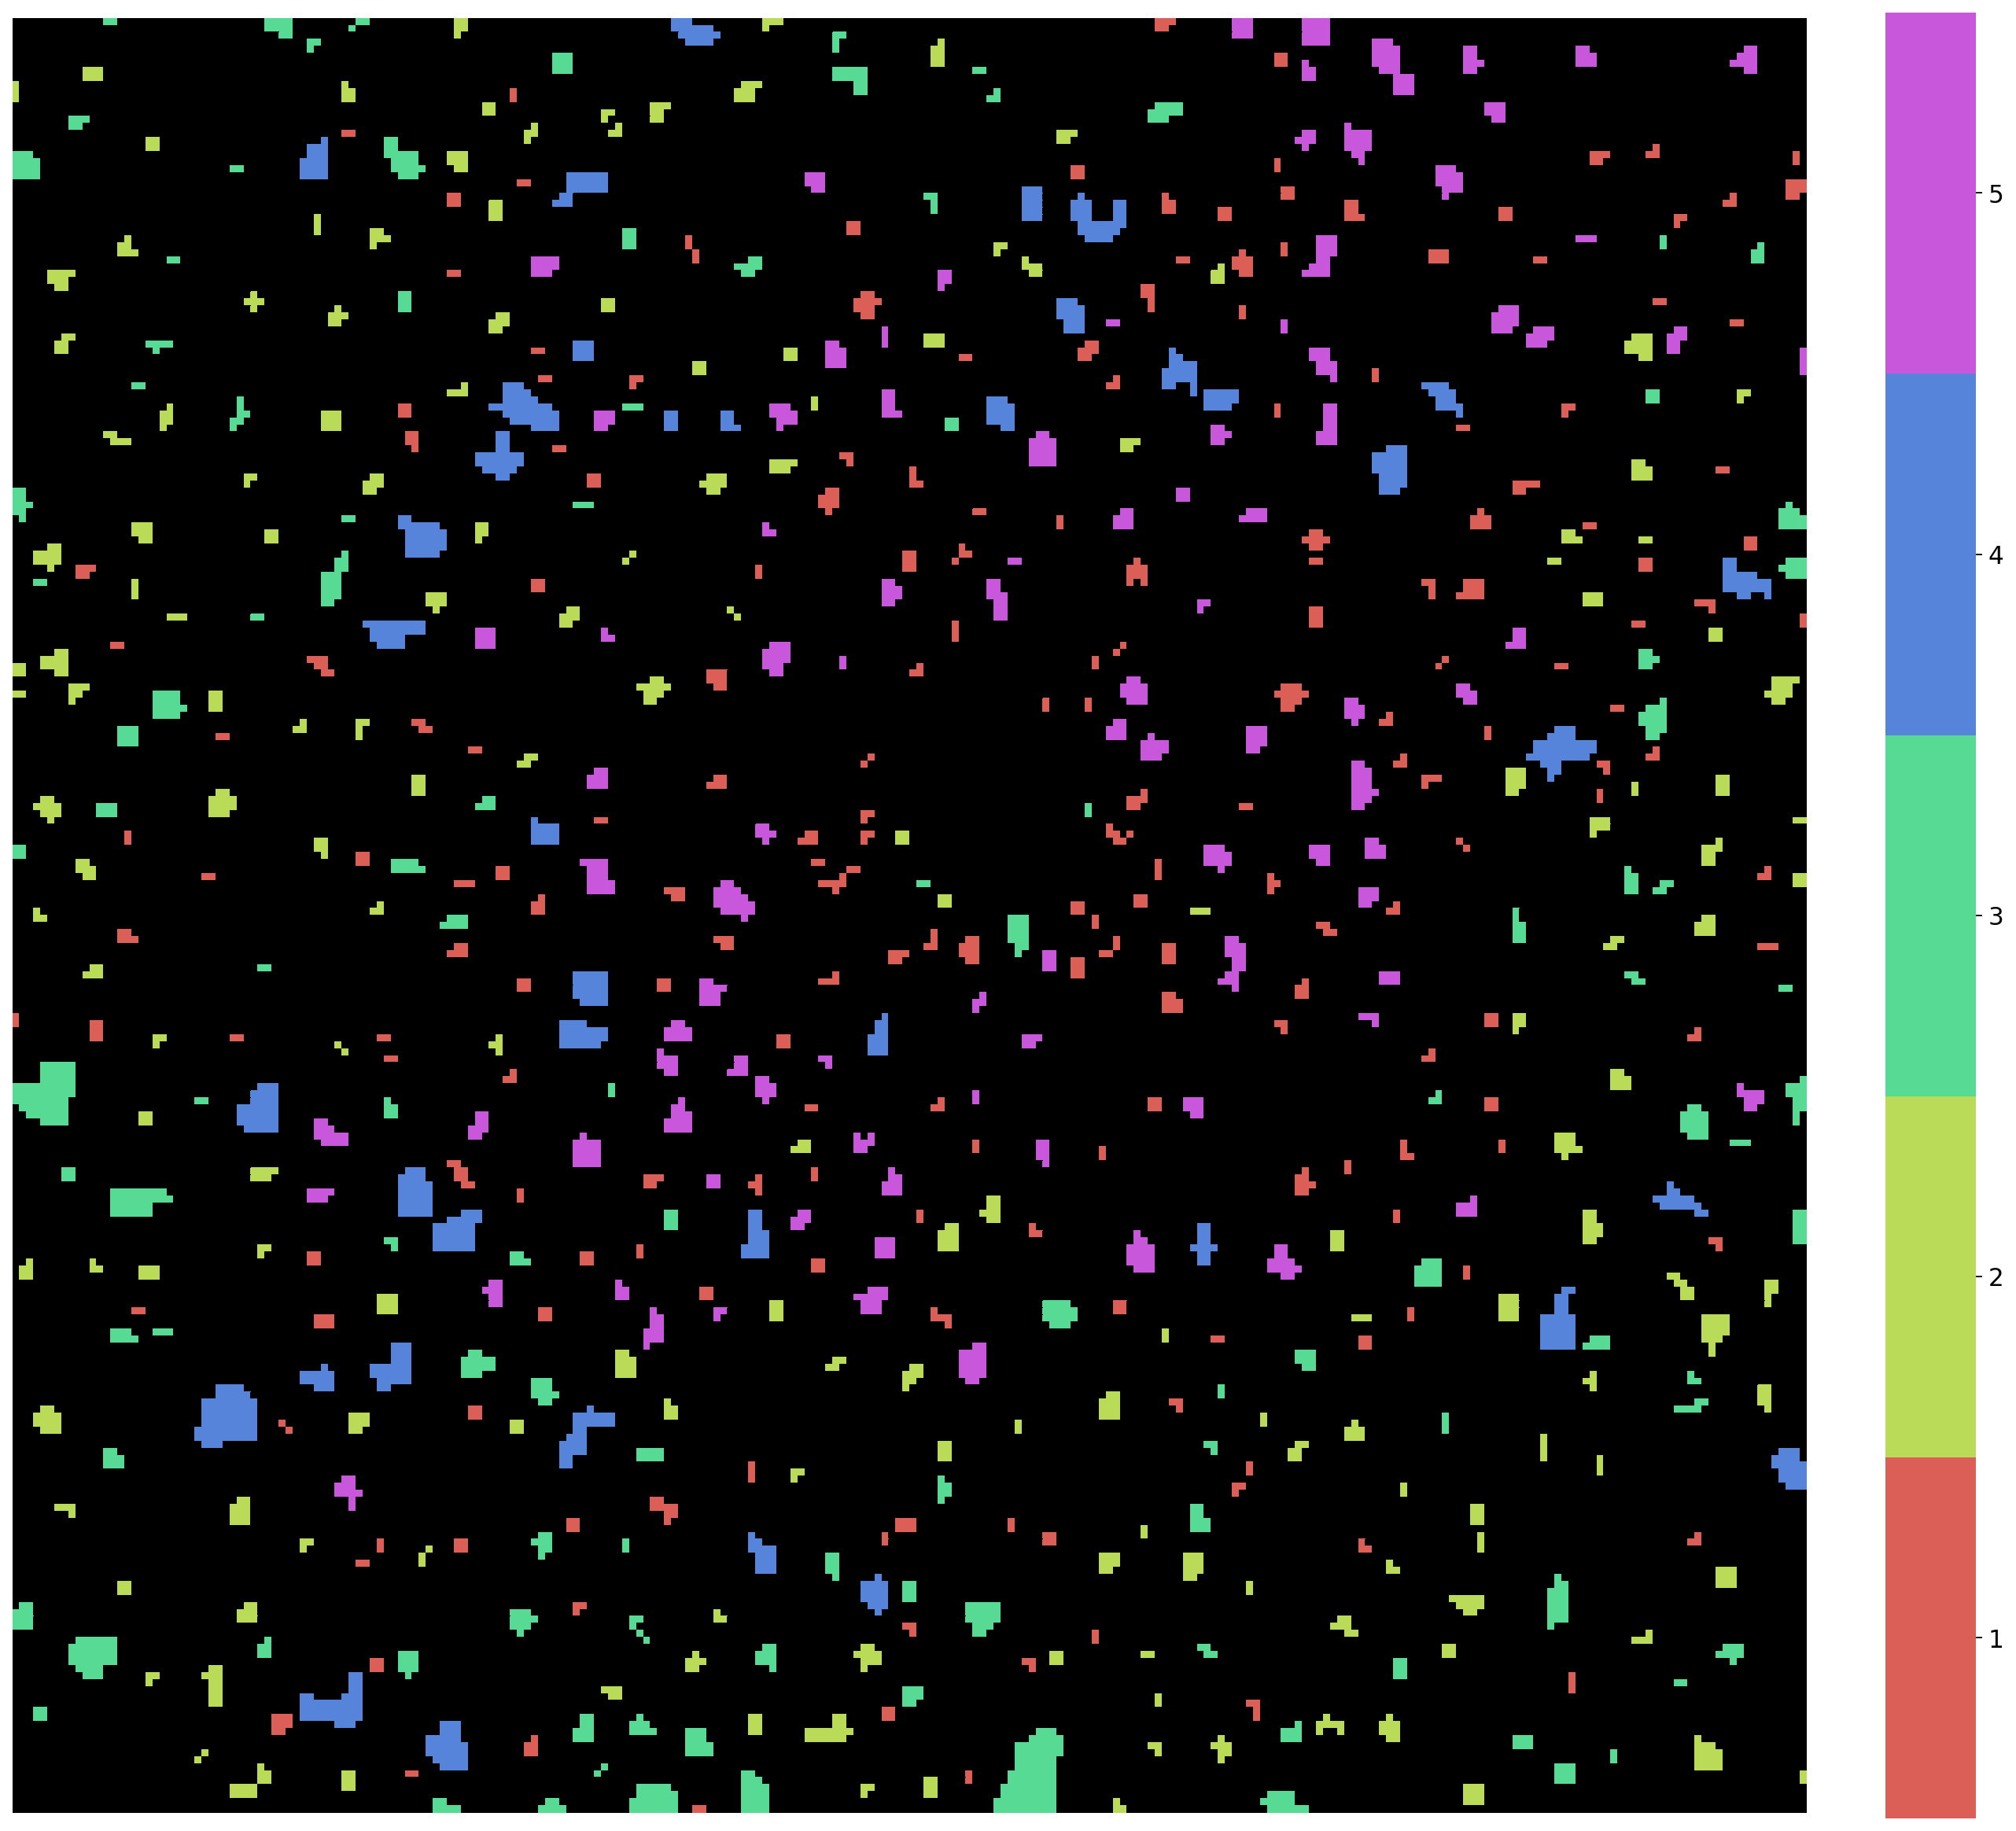

In [258]:
# %matplotlib inline
import matplotlib.pyplot as plt
# uh_pred = hdbscan.HDBSCAN(min_cluster_size=30).fit_predict(rep_embed)
# pred_y = np.ones(shape=(np.max(cell_idx)))
# pred_y = KMeans(3).fit_predict(sim_mat_bak)
# pred_y = SIMLR(sim_mat_bak,-8)
# pred_y = SpectralClustering(4,affinity='precomputed').fit_predict(sim_mat_order_bak)
# pred_y = AgglomerativeClustering(4,affinity='precomputed',linkage='complete').fit_predict(1/(input_sim_mat+1))
# def plot_label_image(pred_y,font_scale):
to_labeling_pred_y = np.array(pred_y)
# to_labeling_pred_y[coc[448,:]>0]=3
# to_labeling_pred_y = resultsLWEA[:,2]
# to_labeling_pred_y = label_list_FF[2]
# to_labeling_pred_y = label_list[3]
# to_labeling_pred_y[mark_list]=3
cluster_cmp = sns.hls_palette(np.unique(to_labeling_pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
labeling = get_labeling(to_labeling_pred_y-np.min(to_labeling_pred_y),cell_idx,cell_pos)
# labeling[labeling==5]=0
img1 = labeling.reshape((256,256))
plt.figure(figsize=(20,20))
# plt.imshow(img1)
ticks=np.arange(np.min(img1)+1,np.max(img1)+1)
boundaries = np.arange(np.min(img1)+0.5,np.max(img1)+1.5)
#     with sns.plotting_context(font_scale=font_scale):
sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,cbar_kws={"ticks":ticks, "boundaries":boundaries,'fraction':0.046,'pad':0.04})
# sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,ad':0.04})
# plt.legend(fontsize=font_size)
plt.xticks([])
plt.yticks([])
    # plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_cluster.pdf',transparent=True,format='pdf',bbox_inches='tight')

#     for i in range(num_cells):
#         cur_idx = i + 1
#         cur_ind = cell_pos[cell_idx==cur_idx][0]
#     #     print(ind2ij(cur_ind,256,0))
#     #     print(ind2ij(cur_ind,256,1))

#         plt.annotate(str(cur_idx-1),(ind2ij(cur_ind,256,1),ind2ij(cur_ind,256,0)),color='red')


plt.show()

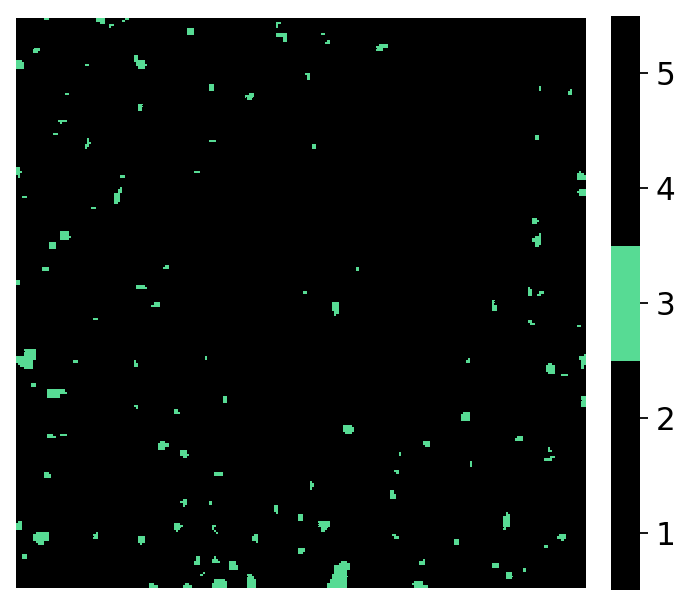

In [268]:
plot_label_image(pred_y,cluster_cmp,mask=2)

In [ ]:
train_x_median = (train_x+1)/(np.percentile(train_x,50,axis=1,keepdims=True)+1)
train_x_total = train_x/np.sum(train_x,axis=1,keepdims=True)
train_x_median = np.log(train_x_median+1)
train_x_total = np.log(train_x_total+1)
train_x_A = (train_x+1)/(train_x[:,matter_list==134.67]+1)
train_x_C = (train_x+1)/(train_x[:,matter_list==51.36]+1)

sum_profile_list_median = []
sum_profile_list_total = []

max_profile_list_median = []
max_profile_list = []
mean_profile_list_median = []
max_profile_list_total = []
mean_profile_list_total = []
mean_profile_list=[]
mean_profile_list_A=[]
mean_profile_list_C=[]

max_profile_list_A = []
for i in range(num_cells):
        mean_profile_list_median.append(np.mean(train_x_median[cell_idx==i+1,:],axis=0))
        max_profile_list_median.append(np.max(train_x_median[cell_idx==i+1,:],axis=0))
        max_profile_list.append(np.max(train_x[cell_idx==i+1,:],axis=0))
        mean_profile_list_A.append(np.mean(train_x_A[cell_idx==i+1,:],axis=0))
        mean_profile_list_C.append(np.mean(train_x_C[cell_idx==i+1,:],axis=0))
        
        max_profile_list_A.append(np.max(train_x_A[cell_idx==i+1,:],axis=0))
        
        sum_profile_list_median.append(np.sum(train_x_median[cell_idx==i+1,:],axis=0))
        mean_profile_list.append(np.mean(train_x[cell_idx==i+1,:],axis=0))
        mean_profile_list_total.append(np.mean(train_x_total[cell_idx==i+1,:],axis=0))
        max_profile_list_total.append(np.max(train_x_total[cell_idx==i+1,:],axis=0))
        sum_profile_list_total.append(np.sum(train_x_total[cell_idx==i+1,:],axis=0))
        
mean_profile_list_median = np.array(mean_profile_list_median)
max_profile_list_median = np.array(max_profile_list_median)
mean_profile_list_total = np.array(mean_profile_list_total)
max_profile_list_total = np.array(max_profile_list_total)
sum_profile_list_median = np.array(sum_profile_list_median)
sum_profile_list_total = np.array(sum_profile_list_total)
mean_profile_list = np.array(mean_profile_list)
max_profile_list = np.array(max_profile_list)
mean_profile_list_A = np.array(mean_profile_list_A)
max_profile_list_A = np.array(max_profile_list_A)
mean_profile_list_C = np.array(mean_profile_list_C)

In [ ]:
import anndata as ad
import scanpy as sc
sc.set_figure_params(dpi=80, color_map='viridis')
sc.settings.verbosity = 2
sc.logging.print_versions()

In [ ]:
# number of observations
# n_obs = 1000
# say we measure the time of observing the data points
# add them to a dataframe for storing some annotation
profile_use=mean_profile_list_median
obs = pd.DataFrame()
# obs['index'] = [str(i)+'m' for i in range(profile_use.shape[0])]
obs['pred'] = [str(y) for y in pred_y]
# obs=obs.set_index('index')
# set the names of variables/features to the following
# ['A', 'B', 'C', ..., 'AA', 'BB', 'CC', ..., 'AAA', ...]
from string import ascii_uppercase
var_names = [str(m) for m in matter_list]
# var_names[-1]='CD79A'
# number of variables
n_vars = len(var_names)
n_obs = len(obs)
# dataframe for annotating the variables
var = pd.DataFrame(index=var_names)
# the data matrix of shape n_obs x n_vars
X =  profile_use
# X = StandardScaler().fit_transform(X)
# X =  np.arange(n_obs*n_vars).reshape(n_obs, n_vars)
adata = ad.AnnData(X, obs=obs, var=var, dtype='double')


In [ ]:
# matter_name_list=[
# #     1:
#     '253.24','255.29',
# #     2:
#     '118.97','53.01','86.01','378.88','208.06','344.9',
# #     3
#     '205.02','166.04','78.95','91.0','224.02','274.9',
# #     4
#     '62.96','56.02','79.97','98.04','74.99','82.02','210.09',
# #     5
#     '465.35','281.27','283.25','76.97'
# ]
# matter_name_list=['87.36','90.36','91.36','94.39','98.4','99.41','101.41','134.48','181.42']
matter_name_list = [str(m) for m in selected_matter_list]
# matter_name_list = ['253.24','255.29']
# matter_name_list = ['M'+str(m).replace('.','P') for m in matter_name_list]
# matter_name_list = pd.DataFrame(matter_name_list,index=matter_name_list)
# matter_name_list = [str(m) for m in matter_name_list]

In [ ]:
matter_name_list

In [ ]:
# marker_matter_list=matter_list[select_condition]
marker_matter_list = [str(m) for m in marker_matter_list]

In [ ]:
ax = sc.pl.heatmap(adata,var_names=marker_matter_list,groupby='pred',swap_axes=True,cmap='vlag',dendrogram=False,standard_scale='var',show_gene_labels=True)



In [ ]:
ax = sc.pl.heatmap(adata,var_names=matter_name_list,groupby='pred',swap_axes=True,cmap='vlag',dendrogram=False,standard_scale='var',show_gene_labels=True)



In [ ]:
sc.pl.dendrogram(adata,groupby='pred')

In [ ]:
ax = sc.pl.stacked_violin(adata, var_names=matter_name_list, groupby='pred',swap_axes=False,dendrogram=True,)

In [ ]:
tmp=mean_profile_list[pred_y==1,matter_list==133.92]/np.mean(mean_profile_list[pred_y==1,:],axis=1,keepdims=False)
plt.hist(tmp)


In [ ]:
pred_y[(to_hist[:,0]>1.75) & (to_hist[:,0]<=2.25)] = 1
pred_y[to_hist[:,0]<=1.75]=0
pred_y[to_hist[:,0]>2.25]=2


In [ ]:
to_hist = mean_profile_list[:,matter_list==133.92]/np.mean(mean_profile_list,axis=1,keepdims=True)
plt.hist(to_hist)

In [ ]:
mean_profile_dec.max()

In [ ]:
mean_profile_list[pred_y==compare_a,matter_list==133.92].shape

In [ ]:
compare_a =1
compare_b = 3
profile_list = mean_profile_dec_sum
# profile_list = profile_list/profile_list[:,matter_list==133.92]
# profile_list = profile_list/profile_list[:,matter_list==134.67]
# A_profile_1 = profile_list[pred_y==compare_a,matter_list==181.67]
# A_profile_2 = profile_list[pred_y==compare_b,matter_list==181.67]

A_profile_1 = profile_list[pred_y==compare_a,matter_list==91.36]
A_profile_2 = profile_list[pred_y==compare_b,matter_list==91.36]

# A_profile_1 = mean_profile_list[pred_y==compare_a,matter_list==133.92]/np.mean(mean_profile_list[pred_y==compare_a,:],axis=1,keepdims=False)
# A_profile_2 = mean_profile_list[pred_y==compare_b,matter_list==133.92]/np.mean(mean_profile_list[pred_y==compare_b,:],axis=1,keepdims=False)


# C_profile_1 = profile_list[pred_y==compare_a,matter_list==110.57]
# C_profile_2 = profile_list[pred_y==compare_b,matter_list==110.57]
C_profile_1 = profile_list[pred_y==compare_a,matter_list==97.36]
C_profile_2 = profile_list[pred_y==compare_b,matter_list==97.36]
# C_profile_1 = profile_list[pred_y==2,matter_list==96.37]
# C_profile_2 = profile_list[pred_y==3,matter_list==96.37]
# C_profile_1 = profile_list[pred_y==2,matter_list==61.28]
# C_profile_2 = profile_list[pred_y==3,matter_list==61.28]

G_profile_1 = profile_list[pred_y==compare_a,matter_list==77.31]
G_profile_2 = profile_list[pred_y==compare_b,matter_list==77.31]
# G_profile_1 = C_profile_1/profile_list[pred_y==2,matter_list==60.26]
# G_profile_2 = C_profile_2/profile_list[pred_y==3,matter_list==60.26]

In [ ]:
plt.subplot(1,3,1)
plt.hist(A_profile_1)
plt.hist(A_profile_2)
plt.subplot(1,3,2)
plt.hist(C_profile_1)
plt.hist(C_profile_2)
plt.subplot(1,3,3)
plt.hist(G_profile_1)
plt.hist(G_profile_2)

In [ ]:
print(np.mean(C_profile_1),np.mean(C_profile_2))

In [ ]:
plt.subplot(1,2,1)
plt.hist(C_profile_1)
plt.subplot(1,2,2)
plt.hist(C_profile_2)

In [ ]:
plt.hist(A_profile_1)

In [ ]:
# %matplotlib inline
import matplotlib.pyplot as plt
# uh_pred = hdbscan.HDBSCAN(min_cluster_size=30).fit_predict(rep_embed)
# pred_y = np.ones(shape=(np.max(cell_idx)))
# pred_y = KMeans(3).fit_predict(sim_mat_bak)
# pred_y = SIMLR(sim_mat_bak,-8)
# pred_y = SpectralClustering(4,affinity='precomputed').fit_predict(sim_mat_order_bak)
# pred_y = AgglomerativeClustering(4,affinity='precomputed',linkage='complete').fit_predict(1/(input_sim_mat+1))
# to_labeling_pred_y = np.zeros_like(pred_y)
to_labeling_pred_y = zonation_y
cluster_cmp = sns.hls_palette(np.unique(to_labeling_pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
# labeling = get_labeling(to_labeling_pred_y-np.min(to_labeling_pred_y),cell_idx,cell_pos)
# to_labeling_pred_y = resultsLWEA[:,2]
# to_labeling_pred_y = label_list_FF[2]
# to_labeling_pred_y = label_list[3]
# to_labeling_pred_y[mark_list]=2
# to_labeling_pred_y[CV_cell_id]=1
labeling = get_labeling(to_labeling_pred_y-np.min(to_labeling_pred_y),cell_idx,cell_pos)
img1 = labeling.reshape((256,256))
plt.figure(figsize=(20,20))
# plt.imshow(img1)

sns.heatmap(img1,square=True,cbar=False,cmap=labeling_plot_cmp)
# sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,ad':0.04})
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber.pdf',transparent=True,format='pdf')

plt.xticks([])
plt.yticks([])
plt.tight_layout()
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber.pdf',transparent=True,format='pdf',bbox_inches='tight')

# for i in range(num_cells):
#     cur_idx = i + 1
#     cur_ind = cell_pos[cell_idx==cur_idx][0]
# #     print(ind2ij(cur_ind,256,0))
# #     print(ind2ij(cur_ind,256,1))
    
#     plt.annotate(str(cur_idx-1),(ind2ij(cur_ind,256,1),ind2ij(cur_ind,256,0)),color='red')
plt.scatter(cell_center_list[:,1],cell_center_list[:,0])

plt.show()

In [ ]:
def AUC_DE(dist_mat,KNN_Y,compare_a,compare_b,matter_list):
    a_idx = np.where(KNN_Y==compare_a)[0]
    b_idx = np.where(KNN_Y==compare_b)[0]
#     print(b_idx)
#     print(b_idx.shape)
    whole_idx = np.hstack([a_idx,b_idx])
    dist_mat_ab = dist_mat[:,whole_idx,:][:,:,whole_idx]
    KNN_Y_ab = KNN_Y[whole_idx]
    print(dist_mat_ab.shape)
    print(KNN_Y_ab.shape)
    AUC_list = []
    for matter in matter_list:
#         print(y,matter)
        clf = KNeighborsClassifier(metric='precomputed')
        
        
        cur_auc_list = cross_val_score(clf, dist_mat_ab[matter_list==matter][0], KNN_Y_ab, scoring='roc_auc',cv=5)  
        cur_auc = np.median(cur_auc_list)
        AUC_list.append(cur_auc)
    AUC_list = np.array(AUC_list)
    return AUC_list

In [ ]:
np.unique(pred_y)

In [ ]:
# 找差异，也就是两两之间比较
# 输入dist_mat,KNN_Y,compare_a,compare_b
compare_a = 1
compare_b = 2
KNN_Y=pred_y.copy()
AUC_list=AUC_DE(dist_mat,KNN_Y,compare_a,compare_b,matter_list)
    

In [ ]:
dist_mat = pickle.load(open('/home/yzy/bioSIMS/data/process/mouse0_liver0_neg0_high0_20_None_auto/cluster/mid/EMD.pkl','rb'))

In [ ]:
dist_mat.shape

In [ ]:
# 找marker，也就是一个类和其他所有类比较
marker_list = []
for y in np.unique(pred_y):
    
    KNN_Y = pred_y.copy()
    KNN_Y[KNN_Y!=y]=-1
    KNN_Y[KNN_Y==y]=-2
    KNN_Y = -KNN_Y
    
    AUC_list = []
    for matter in matter_list:
        print(y,matter)
        clf = KNeighborsClassifier(metric='precomputed')
        
        cur_auc_list = cross_val_score(clf, dist_mat[matter_list==matter][0], KNN_Y, scoring='roc_auc',cv=5)  
        cur_auc = np.median(cur_auc_list)
        AUC_list.append(cur_auc)
    AUC_list = np.array(AUC_list)
    marker_list.append(AUC_list)
    

In [ ]:
KNN_Y = pred_y.copy()
KNN_Y[KNN_Y!=3]=0
KNN_Y[KNN_Y==3]=1

In [ ]:
num_cells

In [ ]:
from sklearn.neighbors import *
from sklearn.model_selection import cross_val_score

matter_KNN = 70.04

clf = KNeighborsClassifier(metric='precomputed')
cross_val_score(clf, dist_mat[matter_list==matter_KNN][0], KNN_Y, scoring='roc_auc',cv=5)  


In [ ]:
KNN_Y = pred_y.copy()
KNN_Y[KNN_Y!=1]=0
KNN_Y[KNN_Y==1]=1
AUC_list = []
for matter in matter_list:
    cur_auc = cross_val_score(clf, dist_mat[matter_list==matter][0], KNN_Y, scoring='roc_auc',cv=10)  
    cur_auc = np.mean(cur_auc)
    AUC_list.append(cur_auc)
AUC_list = np.array(AUC_list)

In [ ]:
1+1

In [ ]:
AUC_list = marker_list[0].copy()
AUC_sort = AUC_list.argsort()
matter_list[AUC_sort]

In [ ]:
AUC_list[AUC_sort]

In [ ]:
%matplotlib inline

In [ ]:
# AUC_list = marker_list[0].copy()
# AUC_list=np.zeros(shape=(train_x.shape[1],))
label_sort = np.argsort(pred_y)
# select_condition = (AUC_list>=np.sort(AUC_list)[-5])
select_condition = (AUC_list>0.9)
# %把底板相关的都指0
# select_condition[interest_matter_idx_list]=0
figsize=(10,np.sum(select_condition==1)*0.3)
unique_idx_list = select_condition
selected_matter_list = matter_list[select_condition]
selected_matter_list_auc = ['{0} auc:{1}'.format(str(m),str(np.around(AUC_list[matter_list==m][0],decimals=2))) for m in selected_matter_list]
sorted_y = np.sort(pred_y)
lut = dict(zip(set(sorted_y),cluster_cmp))
col_colors = pd.DataFrame(sorted_y)[0].map(lut)
de_matter_list = np.transpose(mean_profile_list_median[:,unique_idx_list][label_sort,:])
# de_matter_list = np.log(de_matter_list)
# sns.clustermap(col_colors=col_colors,row_cluster=True,data=pd.DataFrame(de_matter_list),col_cluster=False,cmap="vlag",standard_scale=0,square=True,yticklabels=selected_matter_list,xticklabels=False)
sns.clustermap(figsize=figsize,col_colors=col_colors,row_cluster=True,data=pd.DataFrame(de_matter_list),col_cluster=0,cmap="vlag",standard_scale=0,square=False,yticklabels=selected_matter_list_auc,xticklabels=False)



In [ ]:
# marker_matter_list = []
marker_matter_list.extend(list(matter_list[select_condition]))

In [ ]:
marker_matter_list = list(set(marker_matter_list))

In [ ]:
mean_profile_list_median[:,unique_idx_list][label_sort,:]

In [ ]:
AUC_list[matter_list==84.04][0]

## dict_learning方法，得到test_sample_dec

In [ ]:
test_sample_all.shape

In [ ]:
dic_model = DictionaryLearning(n_components=4,verbose=True,positive_code=True,positive_dict=True,transform_algorithm='lasso_lars',n_jobs=-1)
cor_mat=dic_model.fit_transform(np.transpose(test_sample_all))

In [ ]:
plt.imshow(get_img(59.01))
plt.xticks([])
plt.yticks([])

In [ ]:
tmp = cor_mat/np.sum(cor_mat,axis=1,keepdims=1)
matter_list[np.argsort(tmp[:,0])]

In [ ]:
%matplotlib inline
# dic_model.fit_transform(np.transpose(test_sample_high))
num_components=4
plt.figure(figsize=(10,10))
for i in range(num_components):
    plt.subplot(1,num_components,i+1)
    plt.imshow(dic_model.components_[i,:].reshape(256,256))
    plt.xticks([])
    plt.yticks([])

In [ ]:
X = 2N+C
每一个像素点细胞核的含量是 dic[3]*com[3]
排除掉底板的贡献，
把每个像素点的核和细胞质的成分强行掰成一样的

In [ ]:
cor_mat[matter_list==59.01,:]

In [ ]:
mean_profile_dec[:,matter_list==134.48]

In [ ]:
G_idx = 0
A_idx = 2
num_comp = 3
test_sample_dec = np.zeros_like(test_sample_all)
for i in range(test_sample_all.shape[1]):
    cur_comp = cor_mat[i,:]
#     A_comp = cor_mat[i,A_idx]*dic_model.components_[A_idx,:]
    C_comp = 0
    C_comp_mass = np.zeros(65536,)
    for j in range(num_comp):
        if j==G_idx:
            continue
        if j==A_idx:
            continue
        C_comp+=cor_mat[i,j]
        C_comp_mass += cur_comp[j]*dic_model.components_[j,:]
    A_comp_mass = C_comp*dic_model.components_[A_idx,:]
#     cur_comp = A_comp_mass+C_comp_mass
    cur_comp = C_comp_mass

    test_sample_dec[:,i] = cur_comp


## dict_learning方法，结束

## sparse coding方法，得到test_sample_dec

In [ ]:
pre_computed_dict = []
pre_computed_dict.append(test_sample_all[:,matter_list==134.48])
pre_computed_dict.append(test_sample_all[:,matter_list==76.29])
pre_computed_dict.append(test_sample_all[:,matter_list==111.43])
pre_computed_dict = np.array(pre_computed_dict)[:,:,0]
pre_computed_dict.shape

In [ ]:
pre_computed_dict = dic_model.components_[0:3,:]

In [ ]:
sc_model=SparseCoder(dictionary=pre_computed_dict,n_jobs=-1,positive_code=True,transform_algorithm='lasso_lars',transform_alpha=0)

In [ ]:
sc_cor_mat = sc_model.fit_transform(np.transpose(test_sample_all))

In [ ]:
plt.hist(test_sample_dec[:,matter_list==82.02])

In [ ]:
plt.hist(test_sample_dec[:,0])

In [ ]:
eps=1e-5
test_sample_comp = np.dot(np.transpose(pre_computed_dict),np.transpose(sc_cor_mat))
test_sample_dec = test_sample_all-test_sample_comp
# test_sample_dec = StandardScaler().fit_transform(test_sample_dec)
# test_sample_dec = MinMaxScaler().fit_transform(test_sample_dec)
test_sample_dec-=np.min(test_sample_dec,axis=0)
test_sample_dec[np.abs(test_sample_dec)<eps]=0

In [ ]:
sc_cor_mat[matter_list==87.36,:]

In [ ]:
cor_mat[matter_list==134.04,:]

In [ ]:
dic_model.components_[2,:]

In [ ]:
test_sample_comp[:,matter_list==180.94]

In [ ]:
(test_sample_all[:,matter_list==181.42]-test_sample_comp[:,matter_list==181.42])

In [ ]:
test_sample_dec[:,matter_list==181.42]

In [ ]:
test_sample_all[:,matter_list==134.06]

In [ ]:
test_sample_comp[:,matter_list==134.06]

In [ ]:
test_sample_dec[:,matter_list==134.06]

In [ ]:
to_show=get_img(matter=90.36,matter_list=matter_list,test_sample_all=test_sample_dec)
plt.xticks([])
plt.yticks([])

plt.imshow(to_show,cmap='rocket')
plt.colorbar()

In [ ]:
to_show=get_img(matter=125.48,matter_list=matter_list,test_sample_all=test_sample_dec)
plt.xticks([])
plt.yticks([])

plt.imshow(to_show)

## sparse coding，结束

## 设计dotplot函数，开始

In [ ]:
import matplotlib

In [ ]:
# 先有两个矩阵
# mat1:表圈大小（表达比例）
# mat2:表颜色深浅（最大表达值）
# cluster*matter

# 首先scale，把表达比例转化为圈大小；表达值转化为颜色
mat1 = np.zeros(shape=(5,2))
mat1[:,0] = np.array([0.1,0.3,0.5,0.7,0.9])
mat1[:,1] = np.array([0.1,0.3,0.5,0.7,0.9])-0.05
mat2 = mat1.copy()
cluster_name_list=['c1','c2','c3','c4','c5']
matter_name_list=['m1','m2']

pd_dict={
    'x':[],
    'y':[],
    's':[],
    'h':[],
    'c':[],
    'm':[]
}
for i in range(mat1.shape[0]):
    for j in range(mat1.shape[1]):
        pd_dict['x'].append(j)
        pd_dict['y'].append(i)
        pd_dict['s'].append(mat1[i,j])
        pd_dict['h'].append(mat2[i,j])
        pd_dict['c'].append(cluster_name_list[i])
        pd_dict['m'].append(cluster_name_list[j])

# sns.set(style="darkgrid",context='paper')
plt.style.use('seaborn-notebook')
# def set_style():
#     plt.style.use(['seaborn-white', 'seaborn-paper'])
#     matplotlib.rc("font", family="Times New Roman")
# set_style()


fig, ax = plt.subplots(figsize=(mat1.shape[1],mat1.shape[0]))  
# plt.figure(figsize=(mat1.shape[1],mat1.shape[0]))      
# cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

cmap = sns.cubehelix_palette(as_cmap=True)
g=sns.scatterplot(ax=ax,x='x',y='y',size='s',hue='h',data=pd.DataFrame(pd_dict),sizes=(1,1000),legend=False,palette=cmap)
# plt.xticks(matter_name_list)
# plt.

# fig.colorbar()
g.legend(bbox_to_anchor=(1, 1), ncol=1)
g.set(xlim = (-1,mat1.shape[1]),ylim=(-1,mat1.shape[0]))
xlabels = ['']+matter_name_list
ylabels = ['']+cluster_name_list
g.set_xticklabels(xlabels)
g.set_yticklabels(ylabels)
g.set_xlabel('')
g.set_ylabel('')

In [ ]:
mat2

In [ ]:
train_x_dec[:,matter_list==134.06]

In [ ]:
zonation_y.shape

In [ ]:
# cluster_name_list=['c1','c2','c3','c4','c5','c6','c7','c8']
cluster_name_list=['c1','c2','c3','c4']

# matter_name_list=[78.95,80.99,82.02,91.00,110.03,66.01,153.08,255.29,279.12,281.27,180.94,134.06]
# matter_name_list=[
# #     1:
#     253.24,255.29,
# #     2:
#     118.97,53.01,86.01,378.88,208.06,344.9,
# #     3
#     205.02,166.04,78.95,91,224.02,274.9,
# #     4
#     62.96,56.02,79.97,98.04,74.99,82.02,210.09,
# #     5
#     465.35,281.27,283.25
# ]

matter_name_list = [
#     1:
    59.01,87.00,101.03
]
pred_y = zonation_y
mat1 = np.zeros(shape=(len(cluster_name_list),len(matter_name_list)))
for i in range(len(cluster_name_list)):
    for j in range(len(matter_name_list)):
        cur_score = get_expression_ratio(0.8,0.5,i+1,matter_name_list[j],train_x)
#         cur_score = get_expression_ratio(0.5,i+1,matter_name_list[j],train_x_dec)
        mat1[i,j]=cur_score
mat2 =  np.zeros(shape=(len(cluster_name_list),len(matter_name_list)))
for i in range(len(cluster_name_list)):
    cur_cluster_profile = np.mean(max_profile_list_median[pred_y==i+1,:],axis=0)
    for j in range(len(matter_name_list)):
        cur_score = cur_cluster_profile[matter_list==matter_name_list[j]]
        mat2[i,j] = cur_score

In [ ]:
# 先有两个矩阵
# mat1:表圈大小（表达比例）
# mat2:表颜色深浅（最大表达值）
# cluster*matter

# 首先scale，把表达比例转化为圈大小；表达值转化为颜色
# mat1 = np.zeros(shape=(5,2))
# mat1[:,0] = np.array([0.1,0.3,0.5,0.7,0.9])
# mat1[:,1] = np.array([0.1,0.3,0.5,0.7,0.9])-0.05
# mat2 = mat1.copy()
# cluster_name_list=['c1','c2','c3','c4','c5']
# matter_name_list=['m1','m2']

pd_dict={
    'x':[],
    'y':[],
    's':[],
    'h':[],
    'c':[],
    'm':[]
}
for i in range(mat1.shape[0]):
    for j in range(mat1.shape[1]):
        pd_dict['x'].append(j)
        pd_dict['y'].append(i)
        pd_dict['s'].append(mat1[i,j])
        pd_dict['h'].append(mat2[i,j])
        pd_dict['c'].append(cluster_name_list[i])
        pd_dict['m'].append(matter_name_list[j])

# sns.set(style="darkgrid",context='paper')
plt.style.use('seaborn-notebook')
# def set_style():
#     plt.style.use(['seaborn-white', 'seaborn-paper'])
#     matplotlib.rc("font", family="Times New Roman")
# set_style()


fig, ax = plt.subplots(figsize=(mat1.shape[1],mat1.shape[0]))  
# # plt.figure(figsize=(mat1.shape[1],mat1.shape[0]))      
# # cmap = sns.diverging_palette(240, 10, l=65, center="dark", as_cmap=True)

cmap = sns.cubehelix_palette(as_cmap=True)
g=sns.scatterplot(ax=ax,x='x',y='y',size='s',hue='h',data=pd.DataFrame(pd_dict),sizes=(10,1000),legend=False,palette=cmap)
# plt.xticks(matter_name_list)
# plt.
# plt.scatter(pd_dict['x'], pd_dict['y'], 
#             c = pd_dict['h'], s=pd_dict['s'], cmap="viridis")
# ax = plt.gca()


# fig.colorbar()
g.legend(bbox_to_anchor=(1, 1), ncol=1)
ax.xaxis.set_ticks(np.arange(-1,mat1.shape[1]+1))
ax.yaxis.set_ticks(np.arange(-1,mat1.shape[0]+1))

# g.set(xlim = np.arange(-1,mat1.shape[1]),ylim=np.arange(-1,mat1.shape[0]))
xlabels = ['']+matter_name_list
ylabels = ['']+cluster_name_list
g.set_xticklabels(xlabels)
g.set_yticklabels(ylabels)
g.set_xlabel('')
g.set_ylabel('')

In [ ]:
mat1

## 设计dotplot函数，结束

## 设计zonation，开始

In [ ]:
cell_pos_list=cell_pos[cell_idx==100]
axis0_list=[]
axis1_list=[]

for p in cell_pos_list:
    cur_x=ind2ij(axis=0,ind=p,size=256)
    cur_y=ind2ij(axis=1,ind=p,size=256)    
    axis0_list.append(cur_x)
    axis1_list.append(cur_y)
axis0_list=np.array(axis0_list)
axis1_list=np.array(axis1_list)

    
    

In [ ]:
np.mean(axis0_list)

In [ ]:
np.array(cell_center_list)

In [ ]:
ind2ij(axis=0,ind=257,size=256)
# ind2ij结果是+1，输入也是+1
# cell_pos从1开始

In [ ]:
np.sum(cell_CV_min_dist==0)

In [ ]:
plt.hist(cell_CV_min_dist)

In [ ]:
CV_cell_id = [140,145,159,176,192,203,215,216,223,230,233,235,226,220,204,197,191,179,175,146]
# 从0开始 
#计算所有细胞的中心坐标
cell_center_list=[]
# cell_center_list_x=[]
# cell_center_list_y=[]

for i in range(num_cells):
#     i是以0开始的idx
    cur_pos = cell_pos[cell_idx==i+1]
    cur_pos_x = [ind2ij(axis=0,ind=p,size=256) for p in cur_pos]
    cur_pos_y = [ind2ij(axis=1,ind=p,size=256) for p in cur_pos]
    cur_pos_x = np.array(cur_pos_x)
    cur_pos_y = np.array(cur_pos_y)
    cur_center_x = (cur_pos_x.max()+cur_pos_x.min())/2
    cur_center_y = (cur_pos_y.max()+cur_pos_y.min())/2
    cell_center_list.append((cur_center_x,cur_center_y))
cell_center_list=np.array(cell_center_list)
    



#挑出CV周边细胞的中心坐标
CV_cells_center_list=cell_center_list[CV_cell_id,:]


#计算每个细胞距离CV周边细胞中心坐标的最小值，作为和CV的距离
cell_CV_dist_mat = distance_matrix(cell_center_list,CV_cells_center_list)
cell_CV_min_dist=np.min(cell_CV_dist_mat,axis=1)

#划分距离，histogram



In [ ]:
each_zone_width = 20
zonation_y = np.zeros(shape=(num_cells,))
for i in range(num_cells):
    cur_dist = cell_CV_min_dist[i]
    cur_y = np.floor(cur_dist/each_zone_width)
    zonation_y[i] = cur_y
    

In [ ]:
np.unique(zonation_y).shape[0]

In [ ]:
matter_name_list = [
#     1:
    59.01,87.00,101.03,
#     2:
    134.04,
#     3:
    255.22,279.22
]
# thre_list = np.arange(0.1,1,0.2)
# ratio_list=np.arange(0.1,1,0.2)
thre_list=[0.5]
ratio_list=[0.3]
pred_y = zonation_y
pd_dict = {
    'score':[],
    'thre':[],
    'ratio':[],
    'zone':[],
    'matter':[]
}
for ratio in ratio_list:
    for thre in thre_list:
        for i in range(np.unique(pred_y).shape[0]):
            for j in range(len(matter_name_list)):
#                 cur_score = get_expression_ratio(thre,ratio,i+1,matter_name_list[j],train_x)
                cur_score=get_expression_max(matter_name_list[j],i+1,train_x_median,mode='mean')
                cur_thre = thre
                cur_ratio = ratio
                cur_zone = 'zone'+str(i)
                cur_matter = matter_name_list[j]
                pd_dict['score'].append(cur_score)
                pd_dict['thre'].append(cur_thre)
                pd_dict['ratio'].append(cur_ratio)
                pd_dict['zone'].append(cur_zone)
                pd_dict['matter'].append(cur_matter)
pd_df = pd.DataFrame(pd_dict)
            

In [ ]:
train_x.shape

In [ ]:
def get_expression_max(matter,cell,train_x_use,mode='max'):
    pixel_condition = (cell_idx==cell)
    profile = train_x_use[pixel_condition,:][:,matter_list==matter]
    max_score = np.max(train_x_use[:,matter_list==matter])
    if mode=='max':
        score=np.max(profile)
    if mode=='mean':
        score=np.mean(profile)
    if mode=='median':
        score = np.median(profile)
    return score/max_score

In [ ]:
matter_cmp = sns.hls_palette(np.unique(matter_name_list).shape[0])
g = sns.catplot(x="zone", y="score", hue="matter", col="thre",row='ratio',
                capsize=.2, palette=matter_cmp, height=6, aspect=1.5,
                kind="point", data=pd_df)
g.despine(left=True)
# plt.savefig('/home/yzy/bioSIMS/tmp/zonation_lineplot.pdf',transparent=True,format='pdf',bbox_inches='tight')


In [ ]:
cluster_name_list=['c1','c2','c3','c4']

# matter_name_list=[78.95,80.99,82.02,91.00,110.03,66.01,153.08,255.29,279.12,281.27,180.94,134.06]
# matter_name_list=[
# #     1:
#     253.24,255.29,
# #     2:
#     118.97,53.01,86.01,378.88,208.06,344.9,
# #     3
#     205.02,166.04,78.95,91,224.02,274.9,
# #     4
#     62.96,56.02,79.97,98.04,74.99,82.02,210.09,
# #     5
#     465.35,281.27,283.25
# ]

matter_name_list = [
#     1:
    59.01,87.00,101.03
]
pred_y = zonation_y
mat1 = np.zeros(shape=(len(cluster_name_list),len(matter_name_list)))
for i in range(len(cluster_name_list)):
    for j in range(len(matter_name_list)):
        cur_score = get_expression_ratio(0.8,0.5,i+1,matter_name_list[j],train_x)
#         cur_score = get_expression_ratio(0.5,i+1,matter_name_list[j],train_x_dec)
        mat1[i,j]=cur_score

## 设计zonation，结束

In [ ]:
train_x_dec[:,matter_list==134.06].max()

In [ ]:
train_x_dec = test_sample_dec[cell_pos-1,:]
train_x_dec_sum = (train_x_dec)/(np.sum(train_x_dec,axis=1,keepdims=1))

In [ ]:
mean_profile_dec = []
max_profile_dec = []
mean_profile_dec_sum = []
for i in range(num_cells):
        mean_profile_dec.append(np.mean(train_x_dec[cell_idx==i+1,:],axis=0))
        mean_profile_dec_sum.append(np.mean(train_x_dec_sum[cell_idx==i+1,:],axis=0))
        max_profile_dec.append(np.max(train_x_dec[cell_idx==i+1,:],axis=0))
mean_profile_dec=np.array(mean_profile_dec)
mean_profile_dec_sum=np.array(mean_profile_dec_sum)
max_profile_dec = np.array(max_profile_dec)

In [ ]:
mean_profile_dec.min()

In [ ]:
plt.imshow(test_sample_dec[:,matter_list==109.43].reshape(256,256))

In [ ]:
mean_profile_dec

In [ ]:
%matplotlib inline

In [ ]:
# AUC_list = marker_list[0].copy()
# AUC_list=np.zeros(shape=(train_x.shape[1],))
label_sort = np.argsort(pred_y)
# select_condition = (AUC_list>=np.sort(AUC_list)[-5])
select_condition = (AUC_list>0.8)
# %把底板相关的都指0
# select_condition[interest_matter_idx_list]=0
figsize=(10,np.sum(select_condition==1)*0.3)
unique_idx_list = select_condition
selected_matter_list = matter_list[select_condition]
selected_matter_list_auc = ['{0} auc:{1}'.format(str(m),str(np.around(AUC_list[matter_list==m][0],decimals=2))) for m in selected_matter_list]
sorted_y = np.sort(pred_y)
lut = dict(zip(set(sorted_y),cluster_cmp))
col_colors = pd.DataFrame(sorted_y)[0].map(lut)
de_matter_list = np.transpose(mean_profile_list_median[:,unique_idx_list][label_sort,:])
# de_matter_list = np.log(de_matter_list)
# sns.clustermap(col_colors=col_colors,row_cluster=True,data=pd.DataFrame(de_matter_list),col_cluster=False,cmap="vlag",standard_scale=0,square=True,yticklabels=selected_matter_list,xticklabels=False)
sns.clustermap(figsize=figsize,col_colors=col_colors,row_cluster=True,data=pd.DataFrame(de_matter_list),col_cluster=0,cmap="vlag",standard_scale=0,square=False,yticklabels=selected_matter_list_auc,xticklabels=False)



In [ ]:
# marker_matter_list = []
marker_matter_list.extend(list(matter_list[select_condition]))

In [ ]:
marker_matter_list

In [ ]:
int_matter_list=[
#     1:
    253.24,255.29,
#     2:
    118.97,53.01,86.01,378.88,208.06,344.9,
#     3
    205.02,166.04,78.95,91,224.02,274.9,
#     4
    62.96,56.02,79.97,98.04,74.99,82.02,210.09,
#     5
    465.35,281.27,283.25
]

In [ ]:
np.sort(train_x_use[:,matter_list==int_matter][:,0])

In [ ]:
cell_ind_list[act_npixel_percell_list>=7]

In [ ]:
train_x[cell_idx==161,matter_list==110.03]

In [ ]:
percell_thre = 0.5
int_y = 1
int_matter = 110.03
train_x_use = train_x_dec
# def get_expression_ratio(percell_thre,int_y,int_matter,train_x_use):
int_cell_list = np.where(pred_y==int_y)[0]
act_npixel_percell_list=[]
cell_ind_list=[]
# thre_val = percell_thre*train_x_dec[:,matter_list==int_matter]
thre_val = np.sort(train_x_use[:,matter_list==int_matter][:,0])[int(train_x_use.shape[0]*percell_thre)]
for i in int_cell_list:
    cur_idx = i+1
    cell_condition = (train_x_use[cell_idx==cur_idx,matter_list==int_matter]>thre_val)
    cur_npixel = np.sum(cell_condition)
    act_npixel_percell_list.append(cur_npixel/np.sum(cell_idx==cur_idx))
    cell_ind_list.append(cur_idx)
cell_ind_list = np.array(cell_ind_list)
act_npixel_percell_list = np.array(act_npixel_percell_list)
# return np.sum(act_npixel_percell_list>=0.5)/act_npixel_percell_list.shape[0]

In [ ]:
# percell_thre = 0.5
# int_y = 4
# int_matter = 82.02
# train_x_use = train_x_dec
def get_expression_ratio(percell_thre,pixel_ratio,int_y,int_matter,train_x_use):
    int_cell_list = np.where(pred_y==int_y)[0]
    act_npixel_percell_list=[]
    cell_ind_list=[]
    # thre_val = percell_thre*train_x_dec[:,matter_list==int_matter]
    thre_val = np.sort(train_x_use[:,matter_list==int_matter][:,0])[int(train_x_use.shape[0]*percell_thre)]
    for i in int_cell_list:
        cur_idx = i+1
        cell_condition = (train_x_use[cell_idx==cur_idx,matter_list==int_matter]>thre_val)
        cur_npixel = np.sum(cell_condition)
        act_npixel_percell_list.append(cur_npixel/np.sum(cell_idx==cur_idx))
        cell_ind_list.append(cur_idx)
    cell_ind_list = np.array(cell_ind_list)
    act_npixel_percell_list = np.array(act_npixel_percell_list)
#     0.5是每个细胞中至少一半像素点打到thre，才算表达
    return np.sum(act_npixel_percell_list>=pixel_ratio)/act_npixel_percell_list.shape[0]

In [ ]:
sns_pd = pd.DataFrame({'x':cell_ind_list,'y':act_npixel_percell_list})

In [ ]:
sns.barplot(x='x',y='y',data=sns_pd)

In [ ]:
np.sum(act_npixel_percell_list>=1)/act_npixel_percell_list.shape[0]

In [ ]:
y_list=[1,2,3,4,5]
thre_list=[0.4,0.5,0.6,0.7,0.8,0.9]
ratio_matrix = np.zeros(shape=(len(y_list),len(thre_list)))
int_matter = 110.03
pd_list_y=[]
pd_list_thre=[]
pd_list_ratio=[]
for int_y_ind in range(len(y_list)):
    for percell_thre_ind in range(len(thre_list)):
        int_y = y_list[int_y_ind]
        percell_thre = thre_list[percell_thre_ind]
        cur_ratio = get_expression_ratio(percell_thre,int_y,int_matter,train_x_median)
        ratio_matrix[int_y_ind,percell_thre_ind]=cur_ratio
        pd_list_y.append(int_y)
        pd_list_thre.append(percell_thre)
        pd_list_ratio.append(cur_ratio)
# get_expression_ratio(0.5,1,78.95,train_x_dec)

In [ ]:
pd_df = pd.DataFrame({'thre':pd_list_thre,'y':pd_list_y,'ratio':pd_list_ratio})
sns.barplot(x='thre',y='ratio',hue='y',data=pd_df)

In [ ]:
get_expression_ratio(0.5,1,82.02,train_x_dec)

In [ ]:
interest_matters=[
#     纤维
    56.31,
    110.43,
    70.36,
    #pyruvate
    59.31,
    69.33,
    87.37,
    
#     vein
    80.31,
    
#     nuclei
#     134.49,
#     181.43,
#     FA
    255.85,
    279.85,
    281.88
    
]
interest_matters_idx = [np.where(matter_list==x)[0][0] for x in interest_matters]

In [ ]:
interest_matters_idx

In [ ]:
use_profile = mean_profile_list
mean_cluster_list = []
for i in np.unique(pred_y):
    cur_cluster_mean = np.mean(use_profile[pred_y==i,:],axis=0)
    mean_cluster_list.append(cur_cluster_mean)
mean_cluster_list = np.array(mean_cluster_list)

In [ ]:
mean_cluster_list[:,interest_matters_idx].shape

In [ ]:
interest_matters_str=[
#     纤维
    "56.31",
    "110.43 histamine",
    "70.36",
    #pyruvate
    "59.31",
    "69.33",
    "87.37 pyruvic acid",
    
#     vein
    80.31,
    
#     nuclei
#     134.49,
#     181.43,
#     FA
    "255.85 FA",
    "279.85 FA",
    "281.88 FA"
    
]

In [ ]:
# lut
sns.clustermap(figsize=(3,5),linewidths=.5,col_colors=pd.Series(np.unique(pred_y)).map(lut),row_cluster=True,data=pd.DataFrame(np.transpose(mean_cluster_list[:,interest_matters_idx])),col_cluster=True,cmap="rocket",standard_scale=0,square=False,yticklabels=interest_matters_str,xticklabels=False)


In [ ]:
# diff开始

use_saved_EMD=False
pseudo_count=1
num_features = train_x.shape[1]
# train_x_norm = (train_x_dec+pseudo_count)/(train_x_dec[:,matter_list==134.67]+pseudo_count)
train_x_norm = train_x_dec_sum
print('calculating pairwise wasserstein distance...')
cell_pixel_dict = {}
pixel_count = []
for i in range(num_cells):
    cur_pixels = train_x_norm[cell_idx==i+1,:]
    cell_pixel_dict[i] = cur_pixels
    pixel_count.append(cur_pixels.shape[0])
if use_saved_EMD:
    dist_mat = pickle.load(open(cur_save_path,'rb'))
else:
    dist_mat = np.zeros(shape=(num_features,num_cells,num_cells))
    for k in range(num_features):
        print(k)

        for i in range(num_cells):
            for j in range(num_cells):
                cur_dist = wasserstein_distance(cell_pixel_dict[i][:,k],cell_pixel_dict[j][:,k])
#                 cur_dist = np.abs(np.mean(cell_pixel_dict[i][:,k])-np.mean(cell_pixel_dict[j][:,k]))
                dist_mat[k,i,j] = cur_dist
#     pickle.dump(dist_mat,open(cur_save_path,'wb'))

In [ ]:
dist_mat_sum = dist_mat.copy()

In [ ]:
# diff开始

use_saved_EMD=False
pseudo_count=1
num_features = train_x.shape[1]
# train_x_norm = (train_x+pseudo_count)/(np.percentile(train_x,50,axis=1,keepdims=True)+pseudo_count)
train_x_norm = train_x_dec
# train_x_norm = np.log(train_x_norm+1)
print('calculating pairwise wasserstein distance...')
cell_pixel_dict = {}
pixel_count = []
for i in range(num_cells):
    cur_pixels = train_x_norm[cell_idx==i+1,:]
    cell_pixel_dict[i] = cur_pixels
    pixel_count.append(cur_pixels.shape[0])
if use_saved_EMD:
    dist_mat = pickle.load(open(cur_save_path,'rb'))
else:
    dist_mat = np.zeros(shape=(num_features,num_cells,num_cells))
    for k in range(num_features):
        print(k)

        for i in range(num_cells):
            for j in range(num_cells):
                cur_dist = wasserstein_distance(cell_pixel_dict[i][:,k],cell_pixel_dict[j][:,k])
#                 cur_dist = np.abs(np.mean(cell_pixel_dict[i][:,k])-np.mean(cell_pixel_dict[j][:,k]))
                dist_mat[k,i,j] = cur_dist
#     pickle.dump(dist_mat,open(cur_save_path,'wb'))

In [ ]:
num_cells

In [ ]:
num_features = train_x.shape[1]
dist_mat = np.zeros(shape=(num_features,num_cells,num_cells))
for i in range(num_features):
    print(i)
    a=euclidean_distances(mean_profile_list_median[:,i][:,None])
    dist_mat[i,:,:] = a

In [ ]:
dist_mat[0,:,:] = a

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
planets = sns.load_dataset("planets")

In [ ]:
violin_data = {
#     当前像素点属于哪个类
    'pred_y':[]
    
    
}


In [ ]:
profile_use.shape

In [ ]:
profile_use = (max_profile_list_median)
for i in range(profile_use.shape[0]):
#     belong_cell = cell_idx[i]
    cur_y = pred_y[i]
    violin_data['pred_y'].append(cur_y)
    
    for j in range(profile_use.shape[1]):
        print(i,j)
        cur_matter = matter_list[j]
        if str(cur_matter) not in violin_data:
            violin_data[str(cur_matter)] = []
        violin_data[str(cur_matter)].append(profile_use[i,j])
        

In [ ]:
train_x.shape

In [ ]:
for i in range(train_x.shape[0]):
    belong_cell = cell_idx[i]
    cur_y = pred_y[belong_cell-1]
    violin_data['pred_y'].append(cur_y)
    
    for j in range(train_x.shape[1]):
        print(i,j)
        cur_matter = matter_list[j]
        if str(cur_matter) not in violin_data:
            violin_data[str(cur_matter)] = []
        violin_data[str(cur_matter)].append(train_x_total[i,j])
        

In [ ]:
violin_pd = pd.DataFrame(violin_data)

In [ ]:
marker_list=[101.42,110.43,255.85]
plt.subplot(1,3,1)
ax = sns.violinplot(x=str(marker_list[0]), y="pred_y",data=violin_pd,scale="width", palette=cluster_cmp,orient='h')
# ax.yaxis([])
plt.subplot(1,3,2)
ax = sns.violinplot(x=str(marker_list[1]), y="pred_y",data=violin_pd,scale="width", palette=cluster_cmp,orient='h')
plt.ylabel('')
plt.yticks([])
plt.subplot(1,3,3)
ax = sns.violinplot(x=str(marker_list[2]), y="pred_y",data=violin_pd,scale="width", palette=cluster_cmp,orient='h')
plt.ylabel('')
plt.yticks([])


In [ ]:
interest_i = 3
# 先找出所有纤维细胞的对应的像素点的idx
fiber_cell_pos_list = []
for i in np.where(pred_y==interest_i)[0]:
    fiber_cell_pos_list.extend(list(cell_pos[cell_idx==i+1]-1))

In [ ]:
tmp_img = np.zeros(shape=(65536,))
# test_sample_fiber = test_sample_all[:,matter_list==110.43][:,0]
# tmp_img[test_sample_fiber>=np.max(test_sample_fiber)/2] = 1
tmp_img[fiber_cell_pos_list]=1
tmp_img = tmp_img.reshape(256,256)
cur_cmp = [labeling_plot_cmp[0],labeling_plot_cmp[interest_i]]
# plt.imshow(tmp_img.reshape(256,256),cmap=[labeling_plot_cmp[0],labeling_plot_cmp[4]])
plt.figure(figsize=(20,20))
# plt.imshow(img1)
ticks=np.arange(np.min(img1)+1,np.max(img1)+1)
boundaries = np.arange(np.min(img1)+0.5,np.max(img1)+1.5)
sns.heatmap(tmp_img,cbar=False,cmap=cur_cmp,square=True,cbar_kws={"ticks":ticks, "boundaries":boundaries,'fraction':0.046,'pad':0.04})
# sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,ad':0.04})

plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
def cal_dist(ind1,ind2):
    ind1_i = ind2ij(ind1+1,256,0)
    ind1_j = ind2ij(ind1+1,256,1)    
    ind2_i = ind2ij(ind2+1,256,0)
    ind2_j = ind2ij(ind2+1,256,1) 
    rst=(ind1_i-ind2_i)**2+(ind1_j-ind2_j)**2
#     print(ind1_i,ind1_j,ind2_i,ind2_j,rst)
    return np.sqrt(rst)

In [ ]:
cur_dist_list

In [ ]:
fiber_101_dist_dict = {
    'intensity_101_list':[],
    'min_dist_list':[]
}
for i in range(test_sample_all.shape[0]):
    cur_pos = i
    cur_101 = test_sample_all[i,matter_list==59.31][0]
#     cur_pos_i = ind2ij(cur_pos+1,256,0)
#     cur_pos_j = ind2ij(cur_pos+1,256,1)    
    cur_dist_list=np.array([cal_dist(cur_pos+1,ind+1) for ind in fiber_cell_pos_list])
    cur_min_dist = cur_dist_list.min()
    fiber_101_dist_dict['intensity_101_list'].append(cur_101)
    fiber_101_dist_dict['min_dist_list'].append(cur_min_dist)
    print(i,cur_101,cur_min_dist)
    
    

In [ ]:
fiber_101_dist_pd = pd.DataFrame(fiber_101_dist_dict)

In [ ]:
ax = sns.kdeplot(fiber_101_dist_pd.intensity_101_list, fiber_101_dist_pd.min_dist_list,
                 cmap="Reds", shade=True, shade_lowest=False)

In [ ]:
from skimage.measure import compare_ssim 
def ssim_distmat(data_mat,matter_idx):
#     输入必须是65536*198
    n_dim = data_mat.shape[1]
    rst_0 = np.zeros(shape=(n_dim,n_dim))
    rst_1 = np.zeros(shape=(n_dim,n_dim))
#     rst_0的data_range是两个图的最大／最小
#     rst_1是先把两个图0-1化
    image_mat = data_mat.reshape((256,256,n_dim))
    i_range = [matter_idx]
#     for i in range(n_dim):
    for i in i_range:
        for j in range(n_dim):
            
            cur_img_0 = image_mat[:,:,i]
            cur_img_1 = image_mat[:,:,j]
            
            cur_ssim_0 = compare_ssim(cur_img_0,cur_img_1,data_range=max(cur_img_0.max(),cur_img_1.max())-min(cur_img_0.min(),cur_img_1.min()))
            
            cur_img_0_norm = (cur_img_0-cur_img_0.min())/(cur_img_0.max()-cur_img_0.min())
            cur_img_1_norm = (cur_img_1-cur_img_1.min())/(cur_img_1.max()-cur_img_1.min())
            cur_ssim_1 = compare_ssim(cur_img_0_norm,cur_img_1_norm,data_range=1)
            rst_0[i,j] = cur_ssim_0
            rst_1[i,j] = cur_ssim_1
            print(i,j,cur_ssim_0,cur_ssim_1)
    return rst_0,rst_1

In [ ]:
def spearman_distmat(data_mat):
    rst = np.zeros(shape=(data_mat.shape[0],data_mat.shape[0]))
    for i in range(data_mat.shape[0]):
        for j in range(data_mat.shape[0]):
            cur_spearman = 1-spearmanr(data_mat[i,:],data_mat[j,:])[0]
            rst[i,j] = cur_spearman
            print(i,j,cur_spearman)
    return rst
            
def EMD_distmat(data_mat,matter_idx):
    rst = np.zeros(shape=(data_mat.shape[0],data_mat.shape[0]))
    i_range = [matter_idx]
#     for i in range(data_mat.shape[0]):
    for i in i_range:
        for j in range(data_mat.shape[0]):
            cur_EMD = wasserstein_distance(data_mat[i,:],data_mat[j,:])
            rst[i,j] = cur_EMD
            print(i,j,cur_EMD)
    return rst
        
        